# Importing Libraries and Data Set

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [8]:
df_churn=pd.read_csv('/content/churn_data.csv')

In [9]:
df_cust=pd.read_csv('/content/customer_data.csv')

In [10]:
df_internet=pd.read_csv('/content/internet_data.csv')

In [11]:
df_churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df_churn.info() # No null vales Records are 7043

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


In [13]:
df_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [14]:
df_cust.info() # No Null values Records are 7043

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [15]:
df_internet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [16]:
df_internet.info() # No null Values  Records are 7043

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   MultipleLines     7043 non-null   object
 2   InternetService   7043 non-null   object
 3   OnlineSecurity    7043 non-null   object
 4   OnlineBackup      7043 non-null   object
 5   DeviceProtection  7043 non-null   object
 6   TechSupport       7043 non-null   object
 7   StreamingTV       7043 non-null   object
 8   StreamingMovies   7043 non-null   object
dtypes: object(9)
memory usage: 495.3+ KB


Joining all data set

In [17]:
# Refer Pandas documents  https://pandas.pydata.org/docs/user_guide/merging.html

In [18]:
data= (df_internet.merge(df_cust, on =['customerID'], suffixes=('_left','_right') )).merge(df_churn, on=['customerID'], suffixes=('_left','_right') )

In [19]:
data.head(2)

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,...,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No,Female,...,Yes,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No,Male,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No


In [20]:
data.shape

(7043, 21)

In [21]:
data.columns.values

array(['customerID', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

### data infirmation

  **customerID:** Customer ID

  **MultipleLines:** Whether the customer has multiple lines or not (Yes, No, No phone service)

  **InternetService:** Customer’s internet service provider (DSL, Fiber optic, No)

  **OnlineSecurity:** Whether the customer has online security or not (Yes, No, No internet service)

  **OnlineBackup:** Whether the customer has online backup or not (Yes, No, No internet service)

  **DeviceProtection:** Whether the customer has device protection or not (Yes, No, No internet service)

  **TechSupport:** bold text Whether the customer has tech support or not (Yes, No, No internet service)

  **StreamingTV:** Whether the customer has streaming TV or not (Yes, No, No internet service)

  **StreamingMovies:** Whether the customer has streaming movies or not (Yes, No, No internet service)

  **gender:** gender (female, male)

  **SeniorCitizen:** Whether the customer is a senior citizen or not (1, 0)

  **PartnerWhether:** the customer has a partner or not (Yes, No)

  **Dependents:** Whether the customer has dependents or not (Yes, No)

  **tenure:** Number of months the customer has stayed with the company

  **PhoneService:** Whether the customer has a phone service or not (Yes, No)

  **Contract:** The contract term of the customer (Month-to-month, One year, Two year)

  **PaperlessBilling:** Whether the customer has paperless billing or not (Yes, No)

  **PaymentMethod:** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

  **MonthlyCharges:** The amount charged to the customer monthly

  **TotalCharges:** The total amount charged to the customer

  **Churn:** Whether the customer churned or not (Yes or No)

In [22]:
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [23]:
data['Churn'].value_counts()/data['Churn'].count() # Data divided in 74 :26 Data set is inbalanced
# 26.6 % of customers switched to another firm

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [24]:
data.dtypes

customerID           object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Total Charges are object . Need to convert float

In [25]:
data.TotalCharges.values # It is  string

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [26]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce') # Converting data form object to numaric
print(data.TotalCharges.dtypes)
print(data.TotalCharges.values)

float64
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]


In [27]:
data.isnull().sum() # 11 missing values in Total charges

customerID           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [28]:
data[np.isnan(data['TotalCharges'])] # Lets Find the null values and Index No

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,...,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Female,...,Yes,Yes,0,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Male,...,No,Yes,0,Yes,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Female,...,Yes,Yes,0,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Male,...,Yes,Yes,0,Yes,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Female,...,Yes,Yes,0,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Male,...,Yes,Yes,0,Yes,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Male,...,Yes,Yes,0,Yes,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Female,...,Yes,Yes,0,Yes,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Male,...,Yes,Yes,0,Yes,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Female,...,Yes,Yes,0,Yes,Two year,No,Mailed check,73.35,NaN,No


In [29]:
data[data['tenure'] == 0].index # Tenure is also 0 but Total Charges are alos Nan

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [30]:
data.drop(labels=data[data['tenure'] == 0].index, axis=0, inplace=True) # Dropping index conflicting with Tenure and Total Charges with null Values
data[data['tenure'] == 0].index

Int64Index([], dtype='int64')

In [31]:
data.fillna(data["TotalCharges"].mean())


,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,...,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No,Female,...,Yes,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No,Male,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No,Male,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No,Female,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Male,...,Yes,Yes,24,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Female,...,Yes,Yes,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,No phone service,DSL,Yes,No,No,No,No,No,Female,...,Yes,Yes,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Yes,Fiber optic,No,No,No,No,No,No,Male,...,Yes,No,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Lets Check for Null value sum is  0 or Not

In [32]:
data.isnull().sum() # seems Ok

customerID          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Recheck for Tenure havin 0 Values

In [33]:
data[data['tenure'] == 0].index # Index for Null Values in the data set is Blank Sound OK

Int64Index([], dtype='int64')

In [34]:
data.shape # Earlier (7143 ,21 ) Dopped 11  records in data set

(7032, 21)

<Axes: >

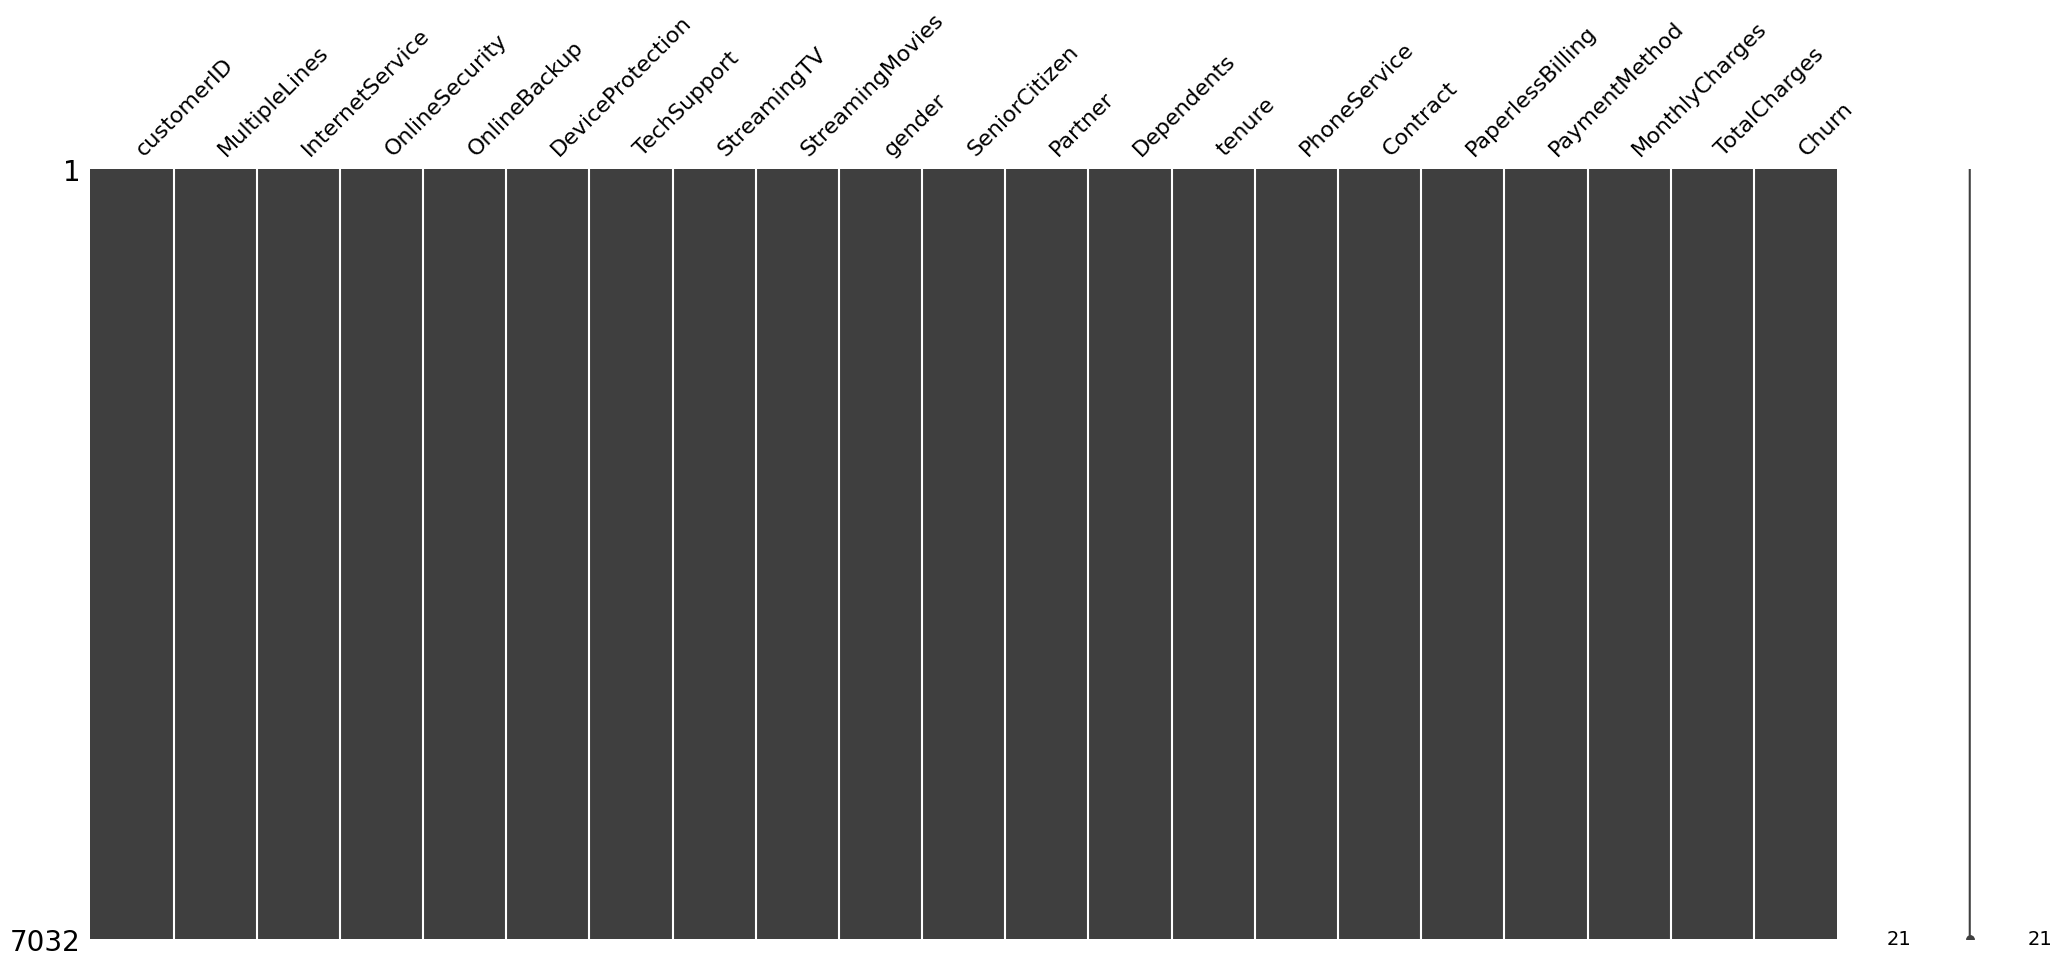

In [35]:
# Lets check missin values
msno.matrix(data)

Droping the CustomerID

In [36]:
data=data.drop(['customerID'],axis=1) # Droping Customer ID as it is index no
data.head(2)
print(data.shape)

(7032, 20)


Meking Numaric Columns Separtae for Data Set

In [37]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges'] # Getting Numaric Data
data[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Let's do some Visualization and Analysis


In [38]:
data['gender'].value_counts()/data['Churn'].count() # Customers are 49.5 % female and 50.5 % male.

Male      0.504693
Female    0.495307
Name: gender, dtype: float64

In [39]:
data["Churn"][data["Churn"]=="No"].groupby(by=data["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [40]:
data["Churn"][data["Churn"]=="Yes"].groupby(by=data["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

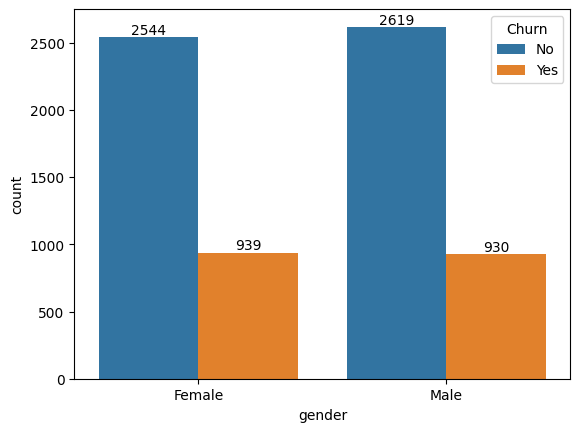

In [41]:
sns.countplot(x='gender', hue='Churn', data=data);
ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

No impact of Gender on churning Rate Amlost 50%


---



---



In [42]:
data['SeniorCitizen'].value_counts()/data['SeniorCitizen'].count()

0    0.8376
1    0.1624
Name: SeniorCitizen, dtype: float64

In [43]:
data['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

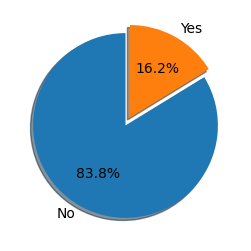

In [44]:
plt.figure(figsize=(5,3))
sizes = data.SeniorCitizen.value_counts()
labels = ["No", "Yes"]
explode = (0, 0.1,)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

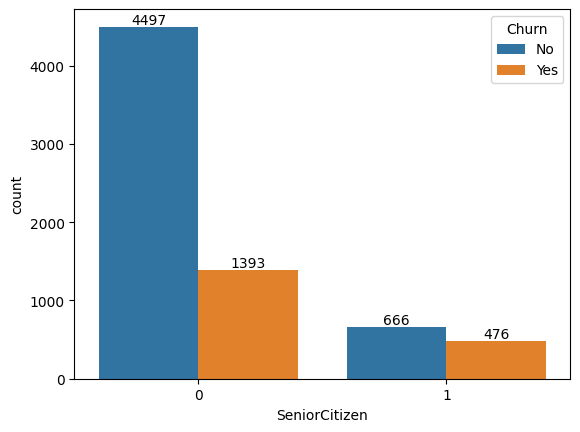

In [45]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=data);
ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

Churning rate is for Non Senior Citizon - is 31%

Churning rate is for  Senior Citizon - is 71%

Conclusion -  Senior Citizon is high impact on total churning rate

---



---

\

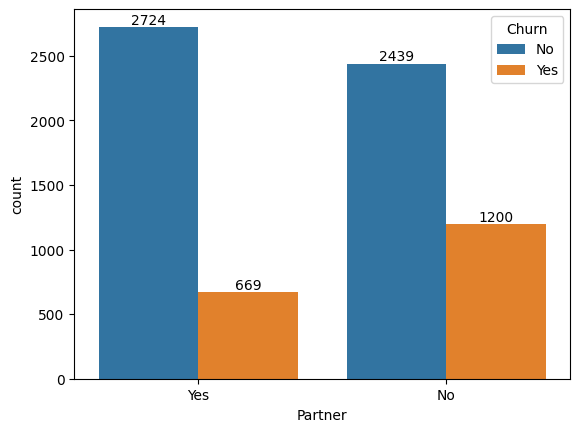

In [46]:
sns.countplot(x='Partner', hue='Churn', data=data);
ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

Partner Chrurning rate 4 %

No partner churning rate - 49 %


---



---



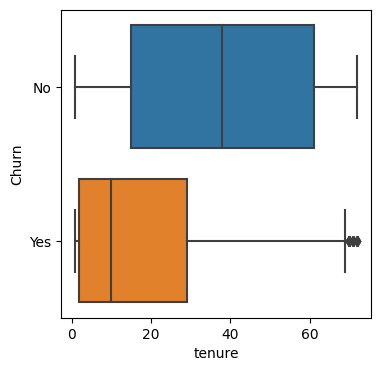

In [47]:
plt.figure(figsize=(4,4))
sns.boxplot(x='tenure', y='Churn',data=data); # New cutomers are chruned

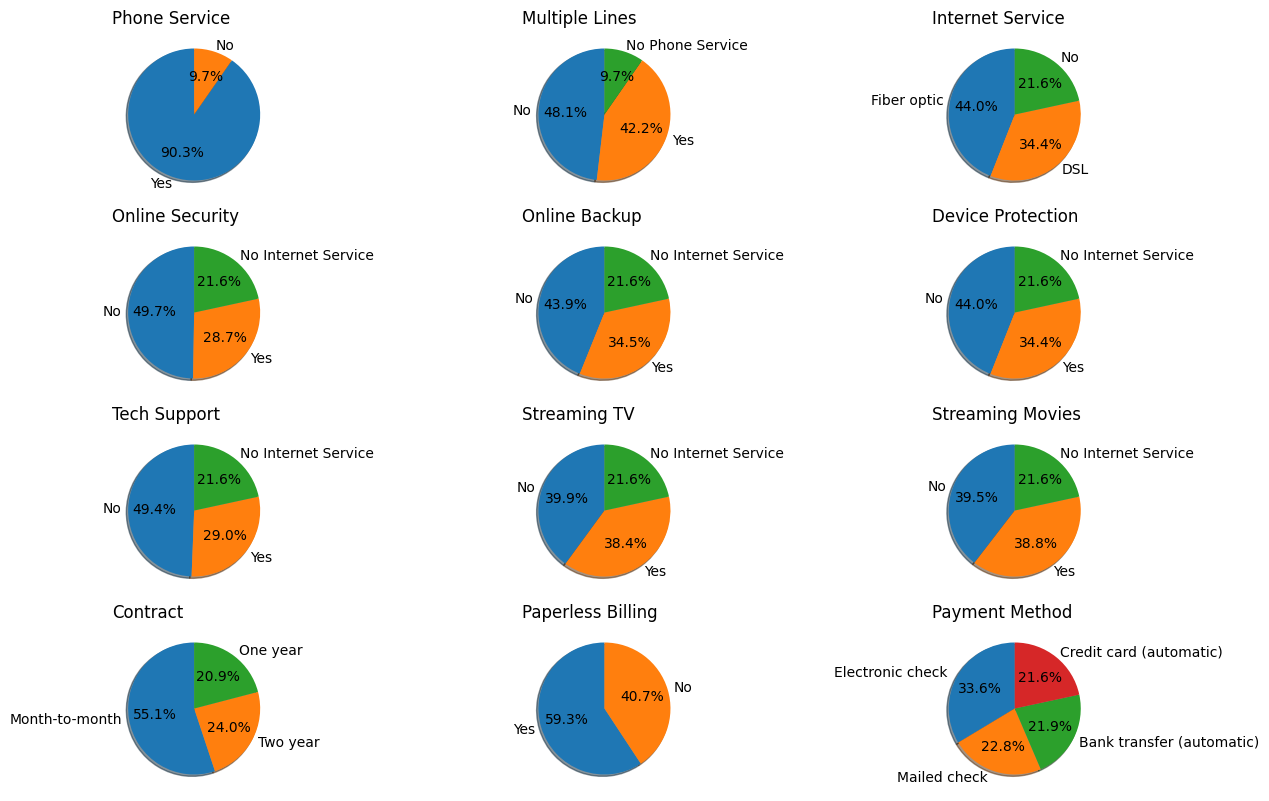

In [48]:
plt.figure(figsize=(15,15))

plt.subplot(6, 3, 1)
sizes = data.PhoneService.value_counts()
labels = ["Yes", "No"]
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Phone Service', loc='left')

plt.subplot(6, 3, 2)
sizes = data.MultipleLines.value_counts()
labels = ["No", "Yes", 'No Phone Service']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Multiple Lines', loc='left')

plt.subplot(6, 3, 3)
sizes = data.InternetService.value_counts()
labels = ["Fiber optic", "DSL", 'No']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Internet Service', loc='left')

plt.subplot(6, 3, 4)
sizes = data.OnlineSecurity.value_counts()
labels = ["No", "Yes", 'No Internet Service']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Online Security', loc='left')

plt.subplot(6, 3, 5)
sizes = data.OnlineBackup.value_counts()
labels = ["No", "Yes", 'No Internet Service']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Online Backup', loc='left')

plt.subplot(6, 3, 6)
sizes = data.DeviceProtection.value_counts()
labels = ["No", "Yes", 'No Internet Service']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Device Protection', loc='left')

plt.subplot(6, 3, 7)
sizes = data.TechSupport.value_counts()
labels = ["No", "Yes", 'No Internet Service']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Tech Support', loc='left')

plt.subplot(6, 3, 8)
sizes = data.StreamingTV.value_counts()
labels = ["No", "Yes", 'No Internet Service']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Streaming TV', loc='left')

plt.subplot(6, 3, 9)
sizes = data.StreamingMovies.value_counts()
labels = ["No", "Yes", 'No Internet Service']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Streaming Movies', loc='left')

plt.subplot(6, 3, 10)
sizes = data.Contract.value_counts()
labels = ["Month-to-month", "Two year", 'One year']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Contract', loc='left')

plt.subplot(6, 3, 11)
sizes = data.PaperlessBilling.value_counts()
labels = ["Yes", "No"]
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Paperless Billing', loc='left')

plt.subplot(6, 3, 12)
sizes = data.PaymentMethod.value_counts()
labels = ["Electronic check ", "Mailed check ", 'Bank transfer (automatic)', 'Credit card (automatic)']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Payment Method', loc='left');

In [49]:
columns = {'PhoneService':1, 'MultipleLines':2, 'InternetService':3, 'OnlineSecurity':4, 'OnlineBackup':5, 'DeviceProtection':6,
          'TechSupport':7, 'StreamingTV':8, 'StreamingMovies':9, 'Contract':10, 'PaperlessBilling':11, 'PaymentMethod':12}

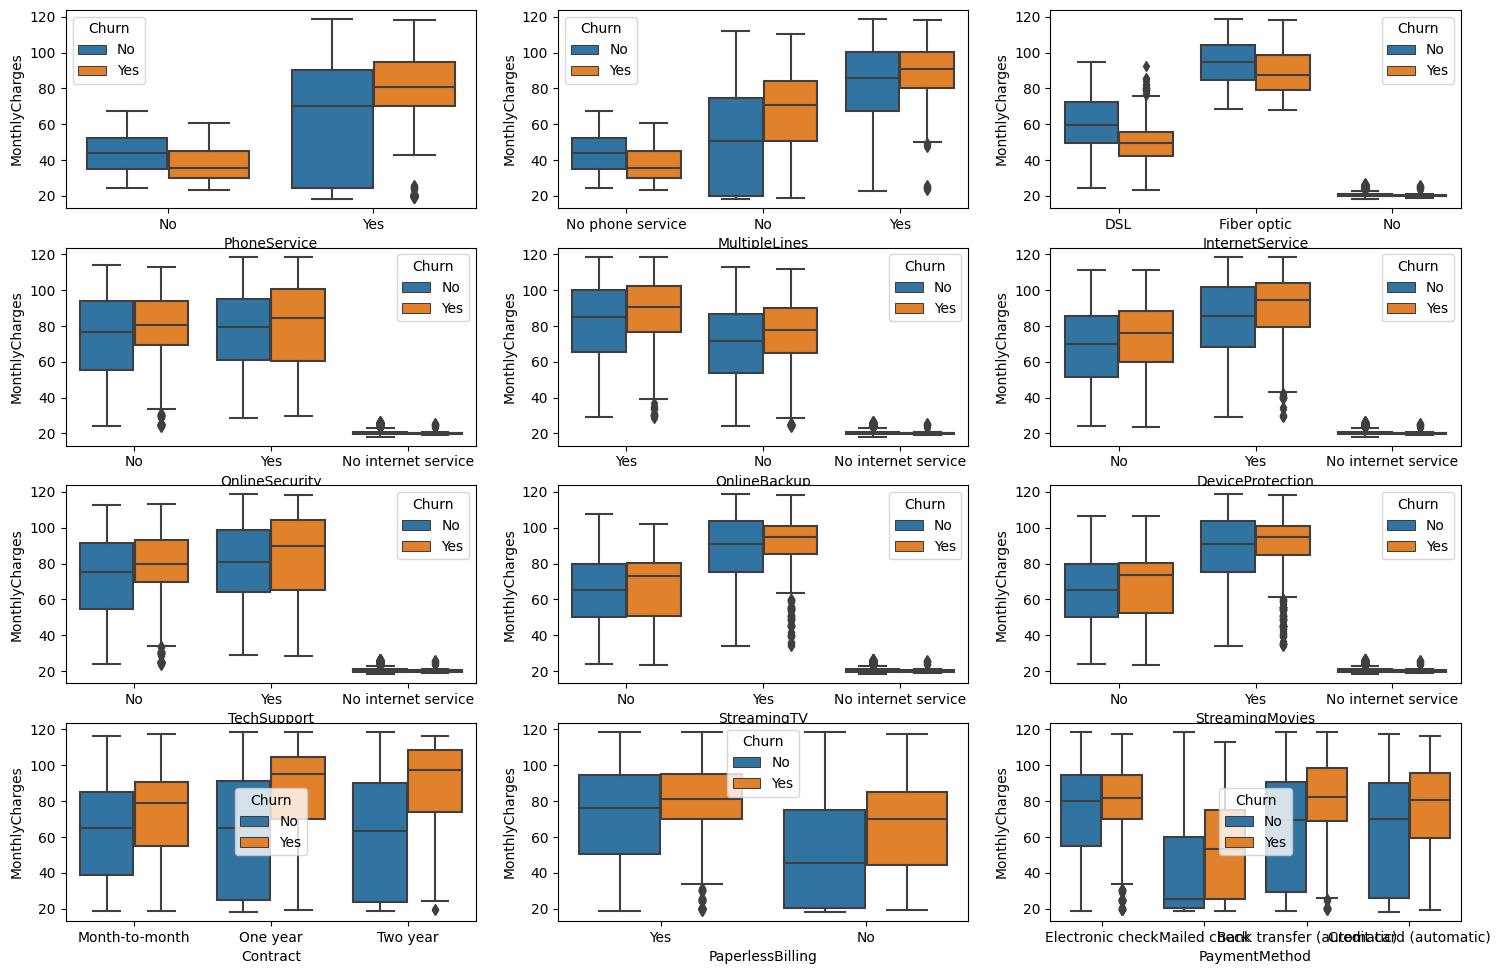

In [50]:
plt.figure(figsize=(18,18))

for key, value in columns.items():
    plt.subplot(6, 3, value)
    sns.boxplot(x=key, y='MonthlyCharges',hue='Churn', data=data);

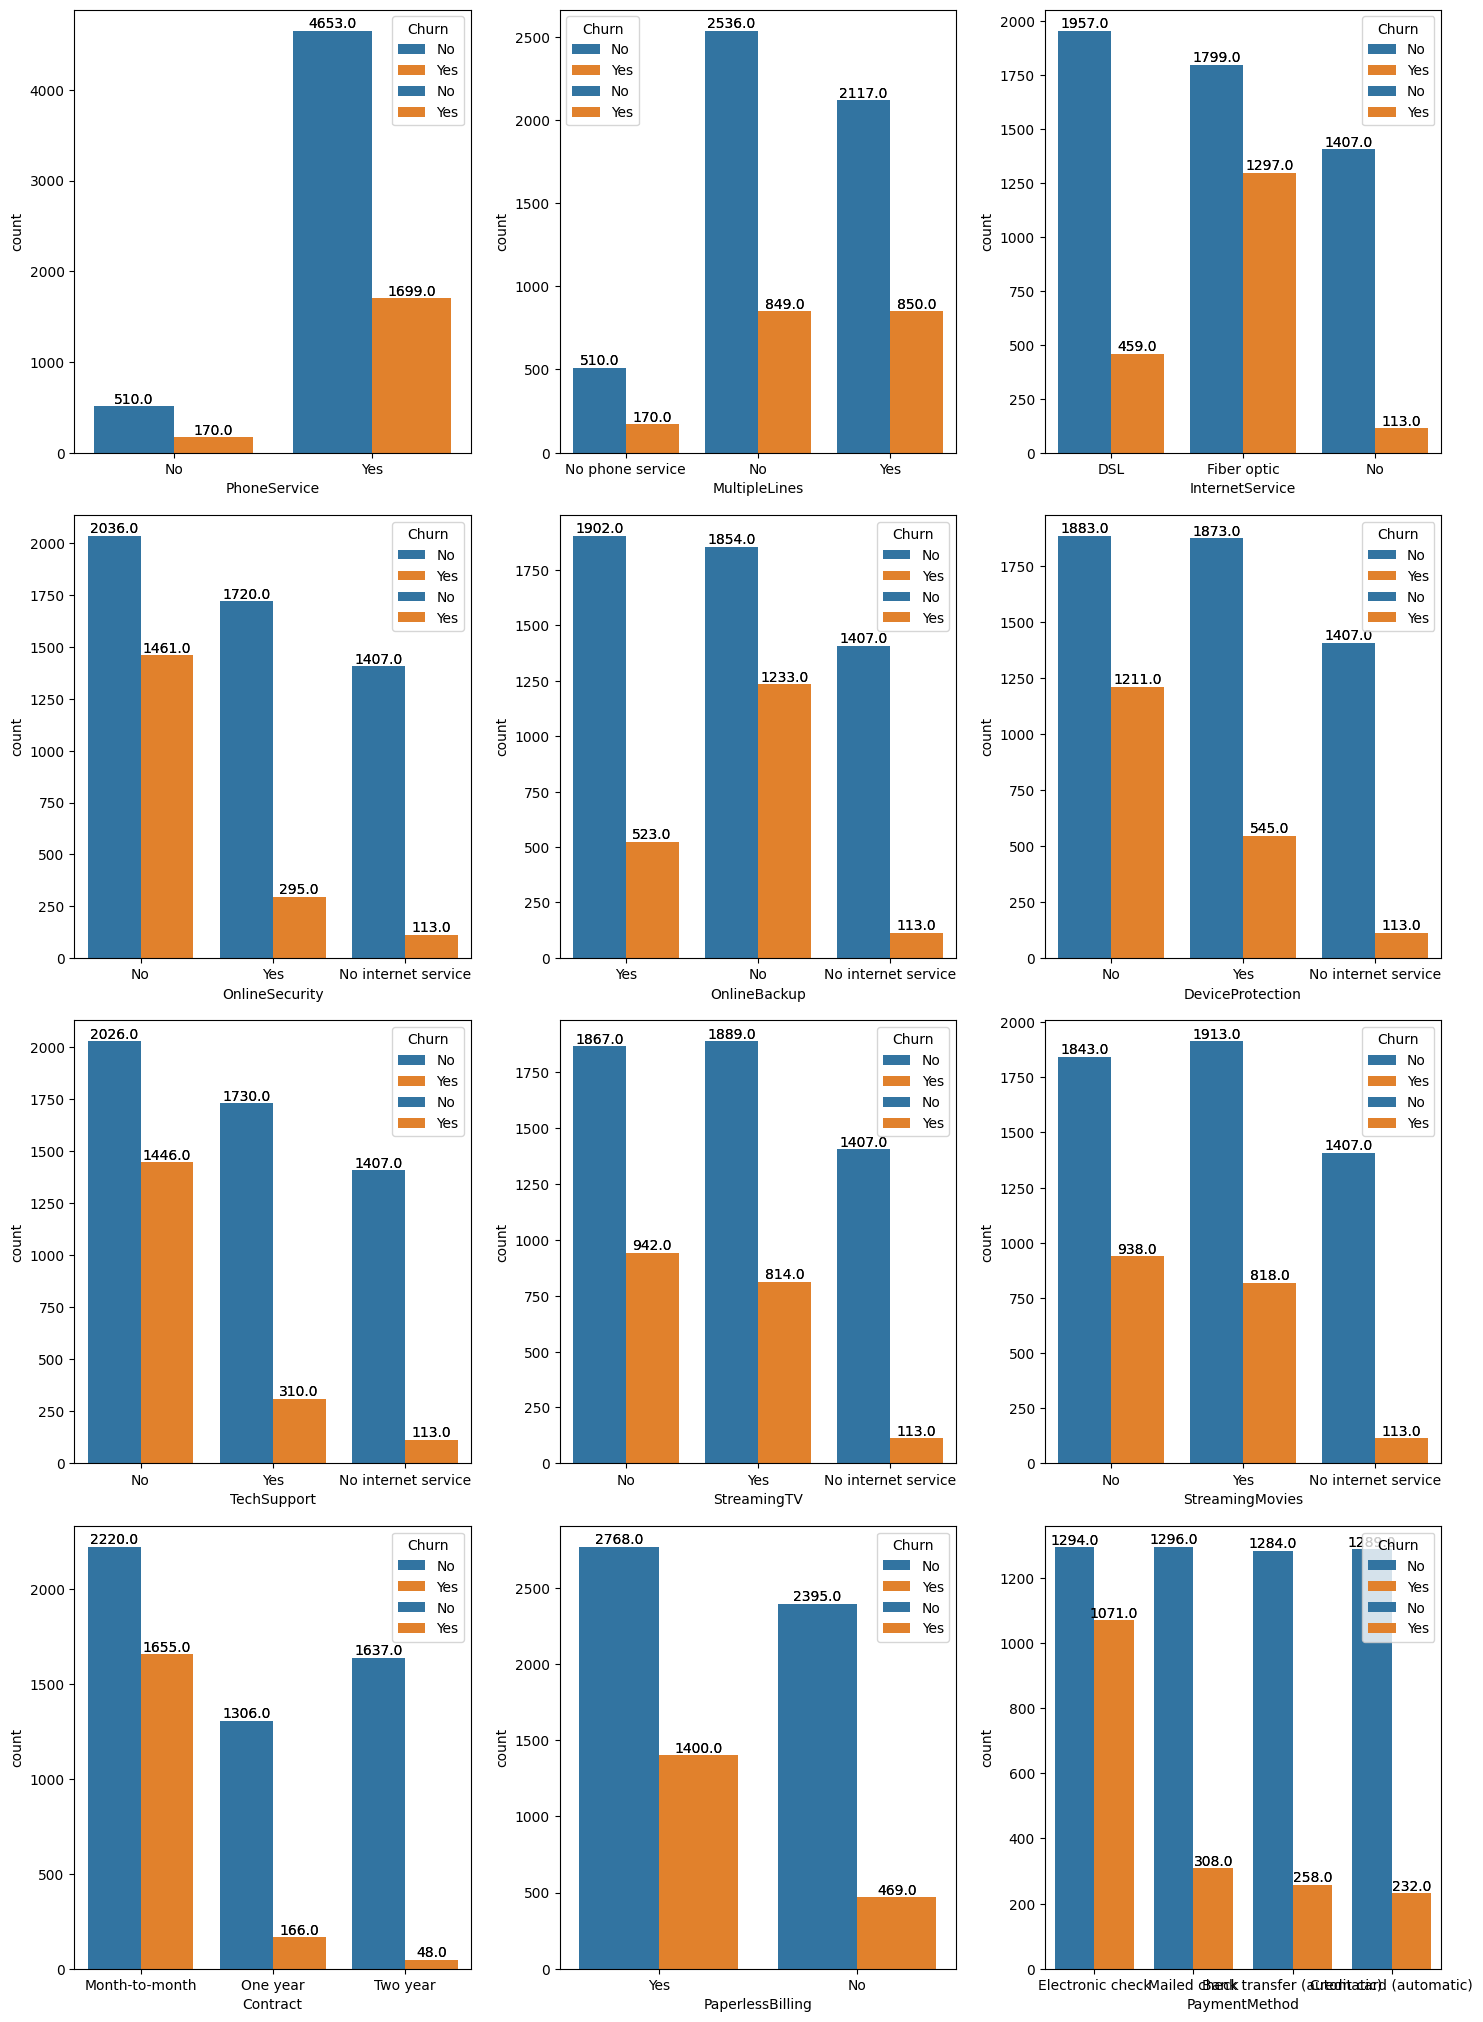

In [51]:
plt.figure(figsize=(15, 30))

for key, value in columns.items():
    plt.subplot(6, 3, value)
    ax=sns.countplot(x=key, hue='Churn', data=data)
    for p in sns.countplot(x=key, hue='Churn', data=data).patches:
        height = p.get_height()
        plt.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom', fontsize=10)




#mplcursors.cursor().connect("add", lambda sel: sel.annotation.set_text(sel.artist.get_height()))
plt.tight_layout()
plt.show()





*   No online security churning rate is High - 71.3 %
*   No online backup Churning rate is High -  66 %
*   No device protection churning rate is High -64 %
*   No Tech Support Chrinig rate is 71%
*   Streamin TV and Streamig movies are good
*   Month to Month contract Churning rate is High about 75 %
*   Electronic Check customer churning rate is High about 82 %






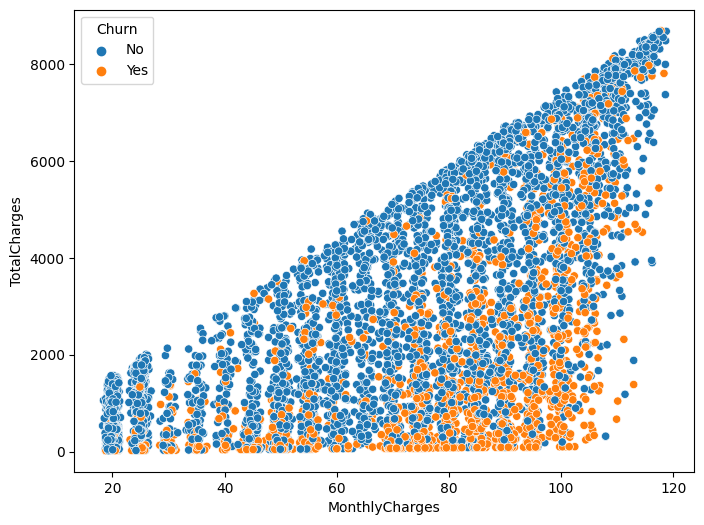

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges',hue='Churn', data=data);
plt.xlabel='Montly charges per month'
plt.show()

MOnthly Chares in range of 70 to 100 and Total Chrages upto 1000 are having high churning rate


---



---



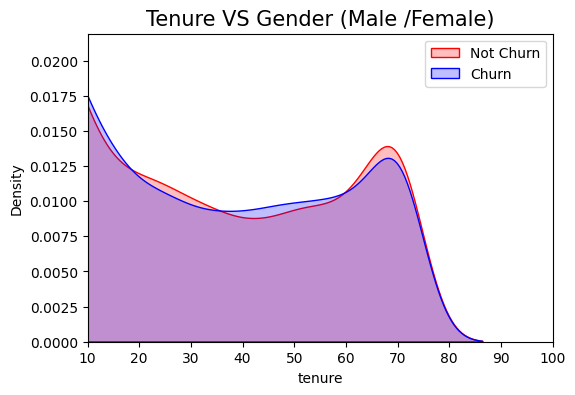

In [53]:
plt.figure(figsize=(6,4))

sns.kdeplot(data[data['gender'] == 'Male']["tenure"], color='red', shade=True)
sns.kdeplot(data[data['gender'] == 'Female']["tenure"], color='blue', shade=True)

plt.title('Tenure VS Gender (Male /Female)', fontsize=15)
plt.legend(["Not Churn","Churn"],loc='upper right');
plt.xlim([10,100])
plt.show()

Gender Density Distrubution is same for Male and Femalw .

Explained in the Bar Chart They are not having any impact on churn rate



---



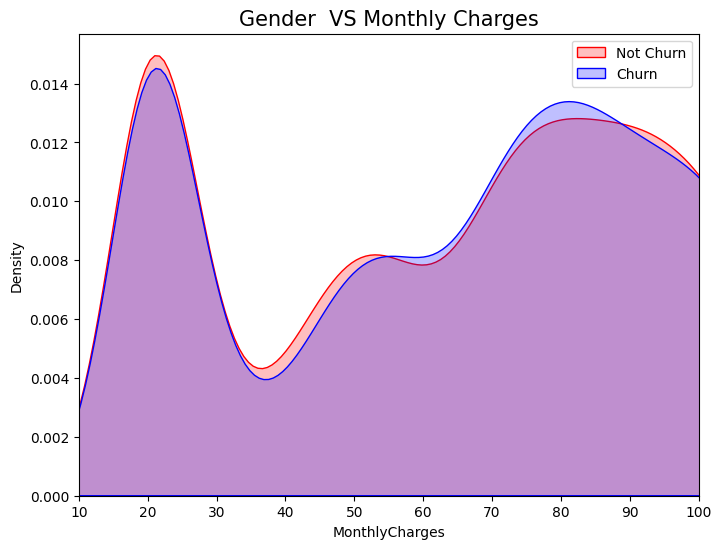

In [54]:
plt.figure(figsize=(8,6))

sns.kdeplot(data[data['gender'] == 'Male']["MonthlyCharges"], color='red', shade=True)
sns.kdeplot(data[data['gender'] == 'Female']["MonthlyCharges"], color='blue', shade=True)

plt.title('Gender  VS Monthly Charges', fontsize=15)
plt.legend(["Not Churn","Churn"],loc='upper right');
plt.xlim([10,100])
plt.show()

Gender and Monthly charges are following same ditrubution for Churning


---



---



---



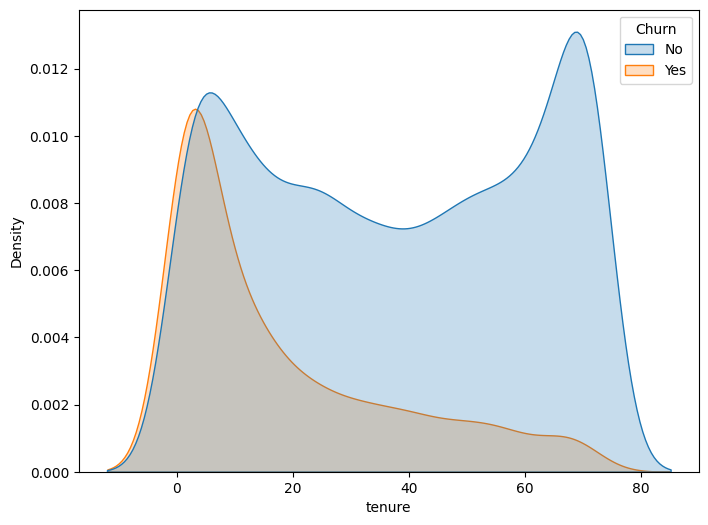

In [55]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x='tenure', hue='Churn', data=data, shade=True);
ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

When Tenure is HIgh churning Rate is very Low.

Threshold maybe  10 Months

---
---




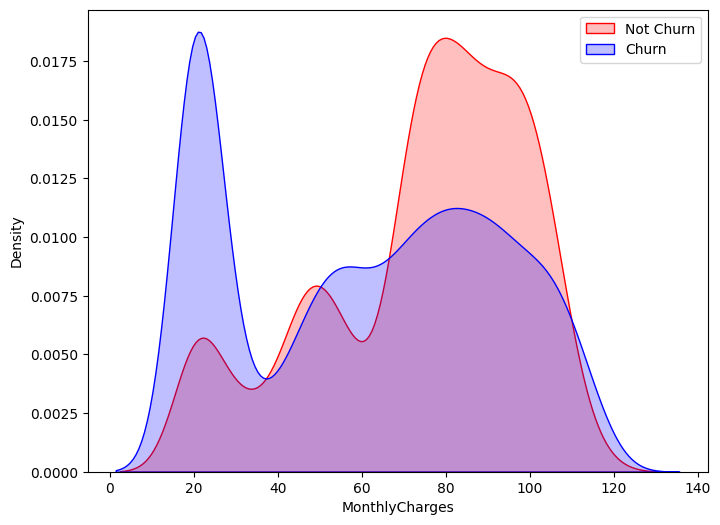

In [56]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data[data['Churn'] == 'Yes']["MonthlyCharges"], color='red', shade=True)
sns.kdeplot(data[data['Churn'] == 'No']["MonthlyCharges"], color='blue', shade=True)
plt.legend(["Not Churn","Churn"],loc='upper right');

Low Monthly charges for range 0 to 10  are having high churning rate


---



---

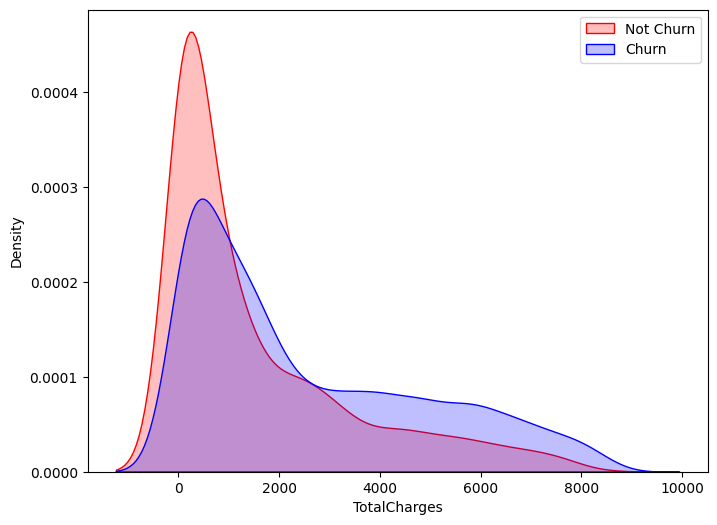

In [57]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data[data['Churn'] == 'Yes']["TotalCharges"], color='red', shade=True)
sns.kdeplot(data[data['Churn'] == 'No']["TotalCharges"], color='blue', shade=True)
plt.legend(["Not Churn","Churn"],loc='upper right');

Count of  people churning for low total charges is low


---



---



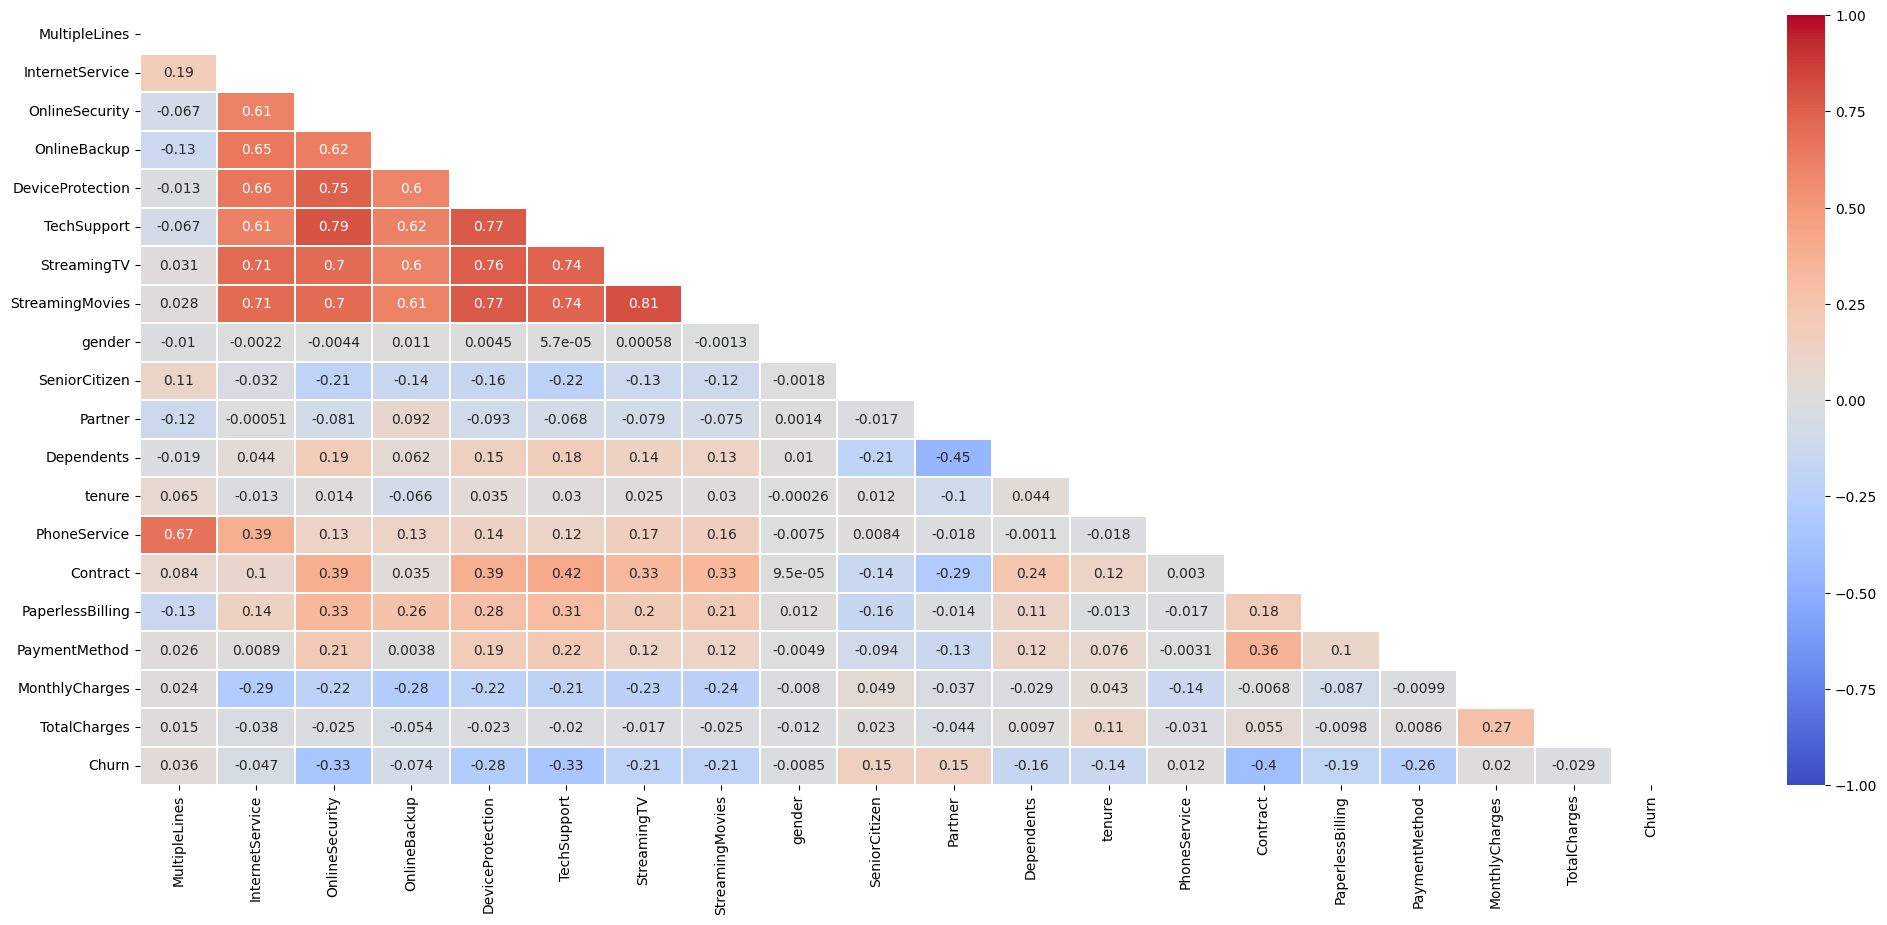

In [58]:
plt.figure(figsize=(25, 10))
corr = data.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [59]:
corr['Churn'].sort_values(ascending = False)

Churn               1.000000
SeniorCitizen       0.150541
Partner             0.149982
MultipleLines       0.036148
MonthlyCharges      0.020303
PhoneService        0.011691
gender             -0.008545
TotalCharges       -0.028994
InternetService    -0.047097
OnlineBackup       -0.073934
tenure             -0.143101
Dependents         -0.163128
PaperlessBilling   -0.191454
StreamingTV        -0.205246
StreamingMovies    -0.207150
PaymentMethod      -0.262918
DeviceProtection   -0.281048
TechSupport        -0.329474
OnlineSecurity     -0.332443
Contract           -0.396150
Name: Churn, dtype: float64

Lets Check data type and unique Categeories

In [60]:
data.dtypes

MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [61]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [62]:
data.replace('No internet service','No',inplace=True)
data.replace('No phone service','No',inplace=True)

In [63]:
print_unique_col_values(data)

MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [64]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    data[col].replace({'Yes': 1,'No': 0},inplace=True)

In [65]:
for col in data:
    print(f'{col}: {data[col].unique()}')

MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [66]:
data['gender'].replace({'Female':1,'Male':0},inplace=True)

In [67]:
data.gender.unique()

array([1, 0])

OHE

In [68]:
data2 = pd.get_dummies(data=data, columns=['InternetService','Contract','PaymentMethod'])
data2.columns

Index(['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [69]:
data2.sample(2)

,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3508,1,1,1,1,1,1,1,1,0,0,...,0,1,0,0,0,1,1,0,0,0
5683,0,0,0,1,0,1,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0


In [70]:
data2.dtypes

MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

Scaling of Numaric Columns in the dataSet


In [71]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data2[cols_to_scale] = scaler.fit_transform(data2[cols_to_scale])

In [72]:
for col in data2:
    print(f'{col}: {data2[col].unique()}')

MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422

In [73]:
X = data2.drop(columns = ['Churn'])
y = data2['Churn'].values

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [75]:
X_train.shape

(4922, 26)

In [76]:
X_test.shape

(2110, 26)

In [77]:
X_train.columns


Index(['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [78]:
from sklearn.feature_selection import chi2
X1 = data2.drop(columns = ['Churn'])
y1 = data2['Churn'].values
f_score=chi2(X1,y1)   #returns f score and p value
f_score

(array([6.51465136e+00, 1.47165601e+02, 3.12098318e+01, 2.02160070e+01,
        1.35439602e+02, 1.73206148e+01, 1.59306111e+01, 2.59115783e-01,
        1.33482766e+02, 8.18577694e+01, 1.31271509e+02, 2.38007569e+02,
        9.29483891e-02, 1.04979224e+02, 5.06002331e+01, 7.32584858e+01,
        7.11376111e+01, 3.72082851e+02, 2.85475152e+02, 5.16714004e+02,
        1.76608724e+02, 4.86223101e+02, 7.66190658e+01, 9.99725387e+01,
        4.24113152e+02, 4.47251434e+01]),
 array([1.06989295e-002, 7.21988253e-034, 2.31590182e-008, 6.91717063e-006,
        2.64595220e-031, 3.15742928e-005, 6.57073922e-005, 6.10728275e-001,
        7.08954608e-031, 1.46240915e-019, 2.15953960e-030, 1.06942847e-053,
        7.60461827e-001, 1.23423173e-024, 1.13231591e-012, 1.13735134e-017,
        3.33158163e-017, 6.58713045e-083, 4.81399951e-064, 2.19511926e-114,
        2.66631661e-040, 9.45428638e-108, 2.07328356e-018, 1.54524820e-023,
        3.10584857e-094, 2.26727030e-011]))

In [79]:
# printing p values for each categorical features
p_value=pd.Series(f_score[1],index=X1.columns)
p_value.sort_values(ascending=True,inplace=True)
print(p_value.sort_values(ascending=True))

Contract_Month-to-month                    2.195119e-114
Contract_Two year                          9.454286e-108
PaymentMethod_Electronic check              3.105849e-94
InternetService_Fiber optic                 6.587130e-83
InternetService_No                          4.814000e-64
tenure                                      1.069428e-53
Contract_One year                           2.666317e-40
OnlineSecurity                              7.219883e-34
TechSupport                                 2.645952e-31
SeniorCitizen                               7.089546e-31
Dependents                                  2.159540e-30
PaperlessBilling                            1.234232e-24
PaymentMethod_Credit card (automatic)       1.545248e-23
Partner                                     1.462409e-19
PaymentMethod_Bank transfer (automatic)     2.073284e-18
TotalCharges                                1.137351e-17
InternetService_DSL                         3.331582e-17
MonthlyCharges                 

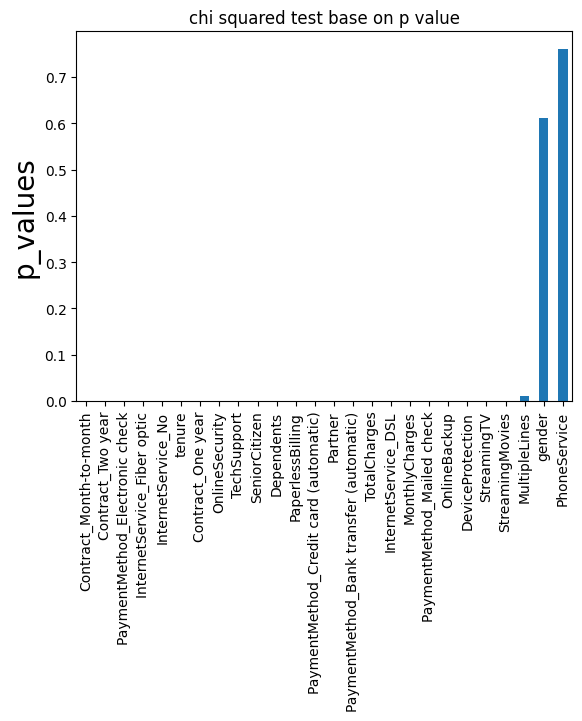

In [80]:
p_value.plot(kind="bar")
#plt.xlabel("Features",fontsize=20)
plt.ylabel("p_values",fontsize=20)
plt.title("chi squared test base on p value")
plt.show()

If we see above plot we can conclude that gender and phoneservice features has p_value >0.05, hence gender and phoneservice does not have much significance on target variable.

So we will need to exclude gender and phoneservice selection for further machine learning modeling.

Important Note :- This technique is based on hypothesis it might be possible some data is important but chi-squared test is not showing that much significance in such scenario our domain knowledge play a pivotal role

---



---





---



---


Lets check Feature Importance with Extra Trees Classifier

---





In [81]:
from sklearn.tree import  DecisionTreeClassifier
# feature extraction
model = DecisionTreeClassifier()
model.fit(X1, y1)
print(model.feature_importances_)

[0.01128627 0.01794792 0.01791935 0.0182006  0.01609596 0.00643377
 0.01248926 0.0269705  0.01650531 0.01921395 0.01834286 0.11402107
 0.00421651 0.01817361 0.20471024 0.19588067 0.00801773 0.04939448
 0.00048936 0.16486388 0.         0.00443635 0.01297032 0.01140471
 0.01711567 0.01289964]


In [82]:
DTFI = pd.DataFrame(model.feature_importances_*100, columns = ["Imp"], index = X1.columns)
DTFI_sorted = DTFI.sort_values(by='Imp', ascending=False)
DTFI_sorted['Cumulative Sum'] = DTFI_sorted['Imp'].cumsum()
DTFI_sorted['Cumulative Sum']
#DTFI.sort_values(by=['Imp'], ascending=False)
print(DTFI_sorted.reset_index().rename(columns={"index": "Feature"}))



                                    Feature        Imp  Cumulative Sum
0                            MonthlyCharges  20.471024       20.471024
1                              TotalCharges  19.588067       40.059092
2                   Contract_Month-to-month  16.486388       56.545480
3                                    tenure  11.402107       67.947587
4               InternetService_Fiber optic   4.939448       72.887035
5                                    gender   2.697050       75.584085
6                                   Partner   1.921395       77.505480
7                                Dependents   1.834286       79.339766
8                          DeviceProtection   1.820060       81.159825
9                          PaperlessBilling   1.817361       82.977187
10                           OnlineSecurity   1.794792       84.771978
11                             OnlineBackup   1.791935       86.563914
12           PaymentMethod_Electronic check   1.711567       88.275481
13    

Top Features are
TotalCharges	 ,MonthlyCharges	Contract_Month-to-month	 ,tenure	InternetService_Fiber optic	 gender	Partner	 ,PaperlessBilling SeniorCitizen	Dependents


---



---



RFE

In [83]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [84]:
model = LogisticRegression(max_iter=400)
rfe = RFE(model)# see best 3 features
fit = rfe.fit(X1, y1)


In [85]:
fit.support_

array([ True,  True, False, False,  True, False, False, False, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True, False, False,  True, False])

In [86]:
# Feature Ranking:
fit.ranking_

array([ 1,  1,  6, 10,  1,  3,  2, 11,  4, 12,  5,  1,  1,  1,  1,  1, 13,
        1,  1,  1, 14,  1,  9,  7,  1,  8])

In [87]:
data=list(zip(X1.columns,rfe.support_,rfe.ranking_))
df=pd.DataFrame(data,columns=['Feature','Support','Ranking'])
sorted_df=df.sort_values('Ranking')
print(sorted_df)

                                    Feature  Support  Ranking
0                             MultipleLines     True        1
21                        Contract_Two year     True        1
19                  Contract_Month-to-month     True        1
18                       InternetService_No     True        1
17              InternetService_Fiber optic     True        1
15                             TotalCharges     True        1
14                           MonthlyCharges     True        1
13                         PaperlessBilling     True        1
24           PaymentMethod_Electronic check     True        1
11                                   tenure     True        1
12                             PhoneService     True        1
4                               TechSupport     True        1
1                            OnlineSecurity     True        1
6                           StreamingMovies    False        2
5                               StreamingTV    False        3
8       

Based on the above tests we have conducted; we can see the feature importance in the dataset. We can have  the below features from the dataset as these are contributing in checking the customer churn rate with high influence

  MultipleLines
  Contract_Two year
  Contract_Month-to-month
  InternetService_No
  InternetService_Fiber optic
  TotalCharges
  MonthlyCharges
  PaperlessBilling
  PaymentMethod_Electronic check
  tenure
  PhoneService
  TechSupport
  OnlineSecurity


---




---



Calling PCA for feature selections

In [88]:
from sklearn.decomposition import PCA

In [89]:
pca=PCA()
X_pca=pca.fit_transform(X1)


In [90]:
pca.explained_variance_

array([9.73336414e-01, 7.38192105e-01, 4.31548869e-01, 2.73050376e-01,
       2.50974677e-01, 2.33874687e-01, 2.18192596e-01, 2.09243204e-01,
       1.99623698e-01, 1.94685263e-01, 1.76660373e-01, 1.60928397e-01,
       1.52024030e-01, 1.42671669e-01, 1.33804135e-01, 1.25124842e-01,
       1.10100927e-01, 9.76464860e-02, 7.74960156e-02, 6.06040782e-02,
       4.38666559e-02, 4.83026960e-03, 8.65882722e-05, 3.75841906e-31,
       4.41959513e-32, 3.23238147e-32])

In [91]:
var=pca.explained_variance_ratio_
var

array([1.94334335e-01, 1.47385909e-01, 8.61621547e-02, 5.45166734e-02,
       5.01090848e-02, 4.66949363e-02, 4.35638825e-02, 4.17770654e-02,
       3.98564546e-02, 3.88704570e-02, 3.52716447e-02, 3.21306310e-02,
       3.03528035e-02, 2.84855304e-02, 2.67150569e-02, 2.49821672e-02,
       2.19825234e-02, 1.94958954e-02, 1.54726942e-02, 1.21000849e-02,
       8.75832579e-03, 9.64401638e-04, 1.72880353e-05, 7.50398176e-32,
       8.82407222e-33, 6.45370599e-33])

In [92]:
var1=np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 19.43,  34.17,  42.79,  48.24,  53.25,  57.92,  62.28,  66.46,
        70.45,  74.34,  77.87,  81.08,  84.12,  86.97,  89.64,  92.14,
        94.34,  96.29,  97.84,  99.05,  99.93, 100.03, 100.03, 100.03,
       100.03, 100.03])

In [93]:

df=pd.DataFrame(var1,X1.columns)
df


,0
MultipleLines,19.43
OnlineSecurity,34.17
OnlineBackup,42.79
DeviceProtection,48.24
TechSupport,53.25
StreamingTV,57.92
StreamingMovies,62.28
gender,66.46
SeniorCitizen,70.45
Partner,74.34


We can use frist 15 Features whihc is contributing almost 90 % of tha dataset for classification problem solving

---


In [94]:
! pip install ppscore # Installing PPscore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13165 sha256=3db80f3e881298a08ba3246af562bd925f33a7c1453bdda5453d41669f89e1a4
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore


In [95]:
import ppscore as pps
import seaborn as sns

#X = data2.drop(columns = ['Churn'])
#y = data2['Churn'].values

In [96]:
def heatmap(df):
    ax = sns.heatmap(df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
    ax.set_title('PPS matrix')
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
    return ax

In [97]:
matrix = pps.matrix(data2)
matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,MultipleLines,MultipleLines,1.0,predict_itself,True,None,0.0000,1.000000,None
1,MultipleLines,OnlineSecurity,0.0,regression,True,mean absolute error,0.2884,0.406075,DecisionTreeRegressor()
2,MultipleLines,OnlineBackup,0.0,regression,True,mean absolute error,0.3418,0.428326,DecisionTreeRegressor()
3,MultipleLines,DeviceProtection,0.0,regression,True,mean absolute error,0.3404,0.431270,DecisionTreeRegressor()
4,MultipleLines,TechSupport,0.0,regression,True,mean absolute error,0.2836,0.403172,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
724,PaymentMethod_Mailed check,Contract_Two year,0.0,regression,True,mean absolute error,0.2330,0.357501,DecisionTreeRegressor()
725,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),0.0,regression,True,mean absolute error,0.2186,0.314361,DecisionTreeRegressor()
726,PaymentMethod_Mailed check,PaymentMethod_Credit card (automatic),0.0,regression,True,mean absolute error,0.2162,0.312350,DecisionTreeRegressor()
727,PaymentMethod_Mailed check,PaymentMethod_Electronic check,0.0,regression,True,mean absolute error,0.3430,0.383608,DecisionTreeRegressor()


In [98]:
matrix.dtypes

x                  object
y                  object
ppscore           float64
case               object
is_valid_score       bool
metric             object
baseline_score    float64
model_score       float64
model              object
dtype: object

In [99]:
data2.shape

(7032, 27)

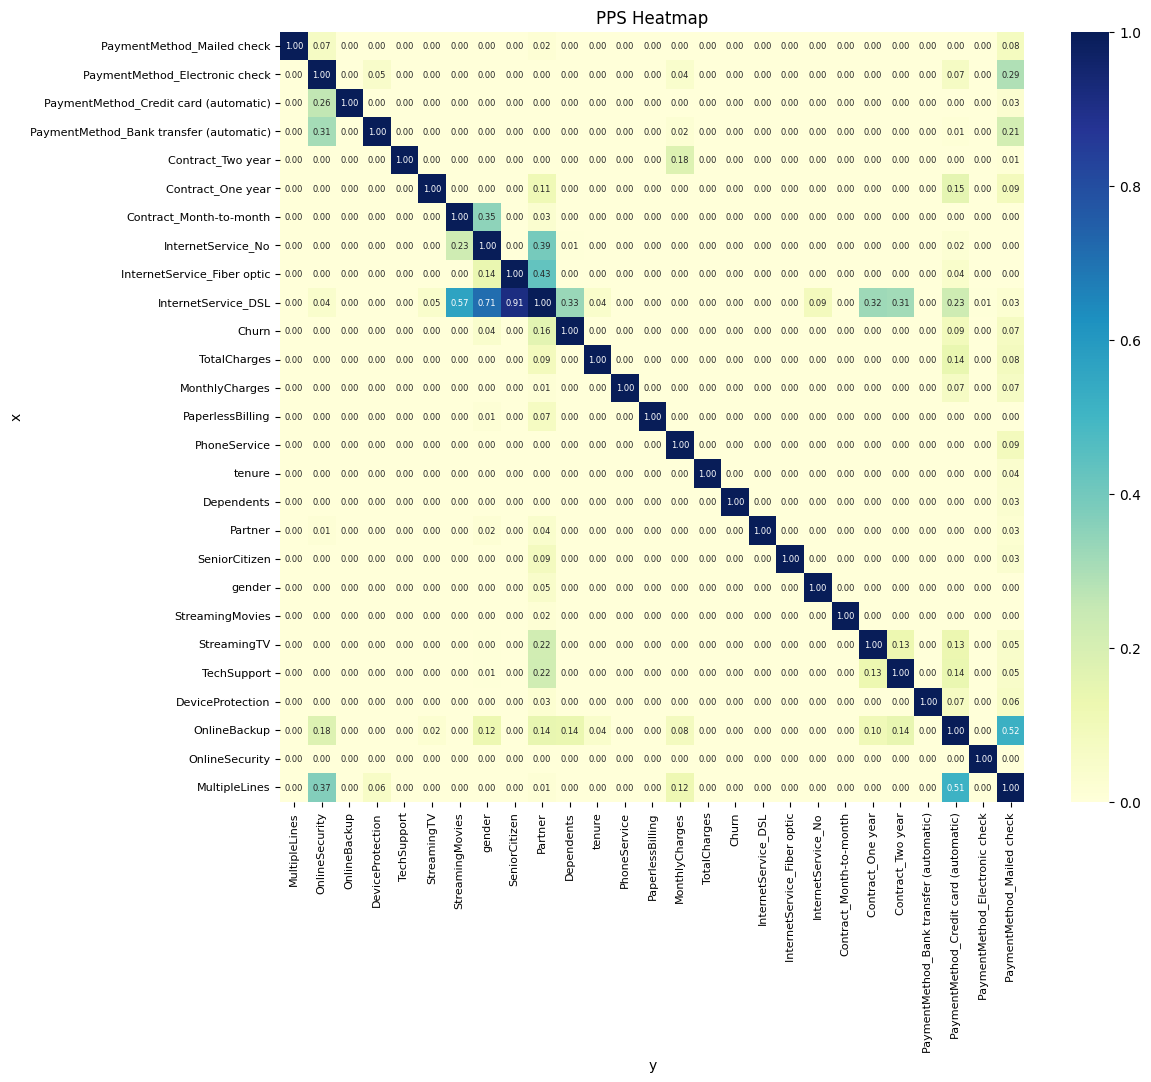

In [100]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as pps

data2_columns = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'gender',
    'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
    'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
    'InternetService_DSL', 'InternetService_Fiber optic',
    'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
    'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
    'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'
]

# Calculate the PPS matrix
pps_matrix = pps.matrix(data2)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the heatmap using a custom function
def heatmap(data, ax):
    sns.heatmap(data, annot=True, cmap="YlGnBu", ax=ax, fmt=".2f")

# Generate the heatmap with custom labels and values
heatmap(pps_matrix.pivot("x", "y", "ppscore"), ax)

# Set the x and y labels
ax.set_xticks(np.arange(len(data2_columns)) + 0.5)
ax.set_yticks(np.arange(len(data2_columns)) + 0.5)
ax.set_xticklabels(data2_columns, rotation=90, fontsize=8)
ax.set_yticklabels(data2_columns[::-1], rotation=0, fontsize=8)

ax.set_xlim(0, len(data2_columns))
ax.set_ylim(len(data2_columns), 0)
plt.setp(ax.texts, fontsize=6)

# Set the title
plt.title("PPS Heatmap")

# Show the plot
plt.show()


In [101]:
data2.columns

Index(['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

Apply t- SNE

In [102]:
!pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.0/87.0 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58647 sha256=69c6b6fa88582de3107802edff83007a6b1dc60620aee9a1b5d44743ad0b24e0
  Stored in directory: /root/.cache/pip/wheels/f8/6e/14/26f84dc04734d9b4614f1a74154aba345568d65c0c145c6543
Successfully built bioinfokit


In [103]:
from sklearn.manifold import TSNE
from bioinfokit.visuz import cluster

In [104]:
#TSNE visualization
data_tsne = TSNE(n_components=2).fit_transform(X) # no of components = 2, max you can go for 3
#cluster.tsneplot(score=data_tsne) #visualize data

In [105]:
data_tsne

array([[-24.368946,  25.098902],
       [ 22.537907,  51.324574],
       [  8.282801,  64.84132 ],
       ...,
       [-22.926992,  24.57497 ],
       [-30.208838, -35.43156 ],
       [ 58.070354,  -8.667558]], dtype=float32)

In [106]:
newdf=pd.DataFrame(data_tsne).join(data2['Churn'])
newdf

,0,1,Churn
0,-24.368946,25.098902,0.0
1,22.537907,51.324574,0.0
2,8.282801,64.841316,1.0
3,26.509447,21.714222,0.0
4,-16.407913,-49.291164,1.0
...,...,...,...
7027,28.200388,42.389538,0.0
7028,39.594215,-2.782118,0.0
7029,-22.926992,24.574970,0.0
7030,-30.208838,-35.431561,0.0


MOdel Building

---



---

Hyper Parameter Tuning Links - https://www.analyticsvidhya.com/blog/2022/02/a-comprehensive-guide-on-hyperparameter-tuning-and-its-techniques/

Why we are using  RepeatedStratifiedKFold

K-Fold Cross-Validation:




 ✅    K-Fold Cross-Validation divides the dataset into K equally sized folds
In each iteration, one fold is used as the test set, and the remaining K-1 folds are used as the training set.
The model is trained and evaluated K times, and the final performance metric is computed by averaging the results from all K iterations.
K-Fold CV is a general-purpose cross-validation technique that provides a reliable estimate of model performance.
StratifiedKFold

✅  StratifiedKFold is a variant of K-Fold Cross-Validation that preserves the class distribution in each fold.
It ensures that each fold contains approximately the same proportion of samples from each class.
StratifiedKFold is particularly useful for imbalanced datasets or when maintaining the class distribution is important.
It helps prevent biases in the evaluation due to uneven class representation.


✅ RepeatedStratifiedKFold:
StratifiedKFold is a variant of K-Fold Cross-Validation that preserves the
class distribution in each fold.
It ensures that each fold contains approximately the same proportion of samples from each class.
StratifiedKFold is particularly useful for imbalanced datasets or when maintaining the class distribution is important.
It helps prevent biases in the evaluation due to uneven class representation.
RepeatedStratifiedKFold:

Summary ⏬

RepeatedStratifiedKFold is an extension of StratifiedKFold that introduces repeated shuffling of the data.
It performs n repetitions of StratifiedKFold, where each repetition uses a new random shuffling of the data before splitting into folds.
RepeatedStratifiedKFold helps obtain a more reliable estimate of model performance by reducing the potential bias introduced by a specific random split.
It is useful when you want to evaluate the model multiple times using different train-test splits to account for variability.
In summary, K-Fold Cross-Validation is a widely used technique for evaluating models. StratifiedKFold is a variant that ensures class distribution preservation, which is crucial for imbalanced datasets. RepeatedStratifiedKFold extends StratifiedKFold by performing repeated shuffling to reduce bias from specific random splits.


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


n_splits : int, default=5
    Number of folds. Must be at least 2.

n_repeats : int, default=10
    Number of times cross-validator needs to be repeated.

---



---






- Scoring Method in GridSearch


When dealing with imbalanced datasets in classification tasks, it is important to choose appropriate scoring methods in GridSearchCV to evaluate and optimize your models. The choice of scoring method can help address the challenges posed by class imbalance and ensure that your model is performing well across different evaluation metrics.

Here are some scoring methods commonly used for imbalanced datasets:
Accuracy: Recall :F1 Score: ROC AUC:Average Precision:


✅
 Also We can use the weighted average of precision, recall, and F1 score as a scoring method to evaluate your models on imbalanced datasets. Weighted average takes into account the class distribution and provides a more meaningful evaluation metric when the classes are imbalanced.

To calculate the weighted average, you need to set the average parameter to 'weighted' when using the make_scorer function in scikit-learn.

Coding part is as follows ⏬


scoring = {

    'Weighted Precision': make_scorer(precision_score, average='weighted'),

    'Weighted Recall': make_scorer(recall_score, average='weighted'),

    'Weighted F1': make_scorer(f1_score, average='weighted')

}


Refit Method in GridSearch CV


 ▶ The purpose of the refit parameter is to refit the best estimator using the best hyperparameters found during the grid search, based on the specified scoring metric. However, the available scoring metrics for refitting are limited to those that can be optimized directly during the grid search process.

 ✅ the case of a weighted F1 score, which takes into account class weights or imbalanced datasets, you can still compute the weighted F1 score after the grid search is complete using the best estimator on the full dataset. However, you need to handle the weighting explicitly in your code, as it won't be directly integrated into the GridSearchCV process.

Default KNN paramaters 🔦

def __init__(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None) Classifier implementing the k-nearest neighbors vote.

Refrence Websites -

✅ https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score


model = KNeighborsClassifier()
n_neighbors =list(range(1,40))  # Determines size of neighborhood in classification. Higher values can smooth out decision boundaries but may also introduce noise
weights = ['uniform', 'distance'] # 'uniform': All points in each neighborhood are weighted equally (default) 'distance': Weight points by the inverse of their distance. Closer neighbors have a greater influence on the prediction.
metric = ['euclidean', 'manhattan', 'minkowski'] #  Distance between data Points
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scoring = make_scorer(f1_score, average='weighted')

scoring = {
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')
}

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=scoring,refit='f1_score',error_score=0)

#When you set refit='f1_score', it means that after the grid search cross-validation is complete,
#GridSearchCV will retrain the final model using the best parameters found and the scoring metric specified by 'f1_score'.
#This allows you to obtain a model that is trained on the full training dataset using the optimal hyperparameters
grid_result = grid_search.fit(X_train, y_train)



In [ ]:
best_f1_score = grid_result.best_score_
best_recall = grid_result.cv_results_['mean_test_recall'][grid_result.best_index_]
best_precision = grid_result.cv_results_['mean_test_precision'][grid_result.best_index_]
best_params = grid_result.best_params_
print("Best F1 Score: %f using %s" % (best_f1_score, best_params))
print("Best Recall: %f using %s" % (best_recall, best_params))
print("Best Precision: %f using %s" % (best_precision, best_params))

Best F1 Score: 0.786865 using {'metric': 'manhattan', 'n_neighbors': 31, 'weights': 'uniform'}
Best Recall: 0.790191 using {'metric': 'manhattan', 'n_neighbors': 31, 'weights': 'uniform'}
Best Precision: 0.785283 using {'metric': 'manhattan', 'n_neighbors': 31, 'weights': 'uniform'}


- KNN Tuned parameters
Best F1 Score: 0.786865 using {'metric': 'manhattan', 'n_neighbors': 31, 'weights': 'uniform'}


In [ ]:
best_params = {'metric': 'manhattan', 'n_neighbors': 31, 'weights': 'uniform'}

knn_classifier = KNeighborsClassifier(metric=best_params['metric'], n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])
knn_classifier.fit(X_train, y_train)
knn_predicted_y = knn_classifier.predict(X_test)
knn_classification_report = classification_report(y_test, knn_predicted_y)
accuracy_knn = knn_classifier.score(X_test, y_test)
confusion_mat = confusion_matrix(y_test, knn_predicted_y)

print("KNN accuracy on training data is:", accuracy_knn)
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(knn_classification_report)


KNN accuracy on training data is: 0.7900473933649289
Confusion Matrix:
[[1334  215]
 [ 228  333]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1549
           1       0.61      0.59      0.60       561

    accuracy                           0.79      2110
   macro avg       0.73      0.73      0.73      2110
weighted avg       0.79      0.79      0.79      2110



In [ ]:
X_test.shape

(2110, 26)

- SVC Hyper Parameter Refrence Websites -

✅ https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/




In [ ]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [1.0, 0.1, 0.01, 10]
gamma = ['scale', 'auto']
grid = dict(kernel=kernel, C=C, gamma=gamma)
scoring = {
    'F1 Score': make_scorer(f1_score, average='weighted'),
    'Recall': make_scorer(recall_score, average='weighted'),
    'Precision': make_scorer(precision_score, average='weighted')
}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=scoring, refit='F1 Score', error_score=0)
grid_result = grid_search.fit(X_train, y_train)




In [ ]:
# Get the best parameters and scores
best_f1_score = grid_search.best_score_
best_recall = grid_search.cv_results_['mean_test_Recall'][grid_search.best_index_]
best_precision = grid_search.cv_results_['mean_test_Precision'][grid_search.best_index_]
best_params = grid_search.best_params_
print("Best F1 Score: %f using %s" % (best_f1_score, best_params))
print("Best Recall: %f using %s" % (best_recall, best_params))
print("Best Precision: %f using %s" % (best_precision, best_params))

Best F1 Score: 0.789925 using {'C': 1.0, 'gamma': 'auto', 'kernel': 'sigmoid'}
Best Recall: 0.796761 using {'C': 1.0, 'gamma': 'auto', 'kernel': 'sigmoid'}
Best Precision: 0.788097 using {'C': 1.0, 'gamma': 'auto', 'kernel': 'sigmoid'}


Best Hyper Paramters for SVC are
Best F1 Score: 0.789925 using {'C': 1.0, 'gamma': 'auto', 'kernel': 'sigmoid'}

In [141]:
svc_model = SVC(C=1,gamma='auto',kernel='sigmoid')
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7919431279620853


In [ ]:
print(classification_report(y_test, predict_y))

In [ ]:
svc_model = SVC(random_state=1, probability=True)  # Setting  probability=True to enable probability estimates
svc_model.fit(X_train, y_train)
decision_values = svc_model.decision_function(X_test)  # Get decision values

# Set threshold and convert decision values to binary predictions
threshold = 0.1  # Adjust the threshold as needed
predicted_y = (decision_values >= threshold).astype(int)

accuracy_svc = svc_model.score(X_test, y_test)
print("SVM accuracy is:", accuracy_svc)

# Generate classification report
classification_rep = classification_report(y_test, predicted_y)
print("Classification Report:\n", classification_rep)

SVM accuracy is: 0.8033175355450237
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1549
           1       0.67      0.48      0.56       561

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110



- Random Forest Classfier

- Hyper Parameter Refrence Websites -

✅ https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/





In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


model = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300], # n_estimators: The number of decision trees in the random forest ensemble. It takes values 100, 200, and 300.
    'max_depth': [None, 5, 10], # The maximum depth of each decision tree. It takes values None, 5, and 10.
    'min_samples_split': [2, 5, 10], # The minimum number of samples required to split an internal node. It takes values 2, 5, and 10.
    'min_samples_leaf': [1, 2, 4], # The minimum number of samples required to be at a leaf node. It takes values 1, 2, and 4.
    'max_features': ['auto', 'sqrt', 'log2'] #  The number of features to consider when looking for the best split. It takes values 'auto', 'sqrt', and 'log2'.
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1_weighted',error_score=0)
grid_result = grid_search.fit(X_train, y_train)



In [ ]:
best_params = grid_result.best_params_
best_f1_score = grid_result.best_score_
best_recall = grid_search.best_score_
best_precision = grid_search.best_score_

# Print the results
print("Best F1 Score: %f using %s" % (best_f1_score, best_params))
print("Best Recall: %f using %s" % (best_recall, best_params))
print("Best Precision: %f using %s" % (best_precision, best_params))

Best F1 Score: 0.791880 using {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Best Recall: 0.791880 using {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Best Precision: 0.791880 using {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}


Best Hypertuned Parameters for RandomForestClassifier are -1 Hr 35 Min

Best F1 Score: 0.791880 using {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}

In [ ]:
model_rf = RandomForestClassifier(n_estimators=200,max_depth=10,max_features='auto',min_samples_leaf=4,min_samples_split=10)
model_rf.fit(X_train, y_train)
# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7945984363894811


In [ ]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.65      0.49      0.56       366

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



In [ ]:
model_rf = RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1,
                                  random_state=50, max_features="auto",
                                  max_leaf_nodes=30)
model_rf.fit(X_train, y_train)

# Get predicted probabilities for the positive class
predicted_probabilities = model_rf.predict_proba(X_test)[:, 1]

# Set threshold and convert predicted probabilities to binary predictions
threshold = 0.1  # Adjust the threshold as needed
predicted_y = (predicted_probabilities >= threshold).astype(int)

accuracy = metrics.accuracy_score(y_test, predicted_y)
print("Accuracy:", accuracy)
classification_rep = classification_report(y_test, predicted_y)
print("Classification Report:\n", classification_rep)

Accuracy: 0.5607675906183369
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.42      0.58      1041
           1       0.37      0.97      0.53       366

    accuracy                           0.56      1407
   macro avg       0.67      0.69      0.56      1407
weighted avg       0.82      0.56      0.57      1407



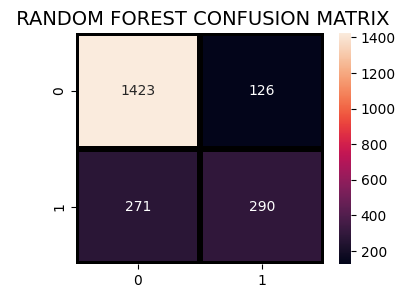

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

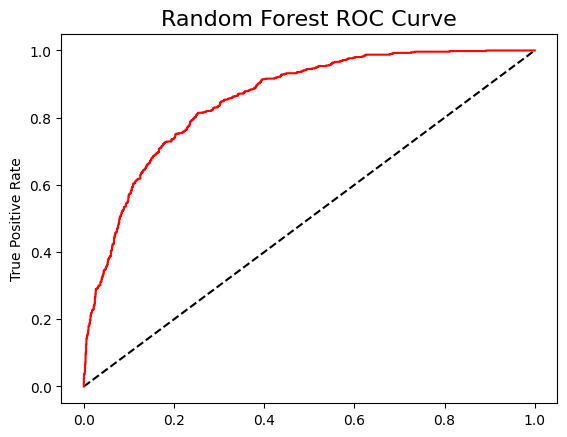

In [ ]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
#plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

- Tuning hyper Parameter of Logstic Regression Model

https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

https://www.analyticsvidhya.com/blog/2022/02/a-comprehensive-guide-on-hyperparameter-tuning-and-its-techniques/

USe this  ✅
https://levelup.gitconnected.com/a-comprehensive-analysis-of-hyperparameter-optimization-in-logistic-regression-models-521564c1bfc0

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

model = LogisticRegression()
param_grid = {
    'penalty': ['l1', 'l2'],   # specifies the regularization penalty term used in logistic regression. L1 regularization (Lasso) L2 regularization (Ridge).
    'C': [0.01, 0.1, 1, 10, 100], #  The C controls the inverse of the regularization strength. Smaller values of C increase the regularization strength, while larger values decrease
    'class_weight': [None, 'balanced']# By including 'balanced' in the list, grid search will consider using class weights that are inversely proportional to the class frequencies in the training data.
                                       #This is useful when dealing with imbalanced datasets.
}
scoring = {
    'weighted_f1': make_scorer(f1_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'precision': make_scorer(precision_score, average='weighted')
    }
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,refit='weighted_f1',cv=cv,return_train_score=True)
grid_result = grid_search.fit(X_train, y_train)



In [ ]:
best_params = grid_result.best_params_
best_f1_score = grid_result.best_score_
best_recall = grid_search.best_score_
best_precision = grid_search.best_score_

# Print the results
print("Best F1 Score: %f using %s" % (best_f1_score, best_params))
print("Best Recall: %f using %s" % (best_recall, best_params))
print("Best Precision: %f using %s" % (best_precision, best_params))

Best F1 Score: 0.795306 using {'C': 100, 'class_weight': None, 'penalty': 'l2'}
Best Recall: 0.795306 using {'C': 100, 'class_weight': None, 'penalty': 'l2'}
Best Precision: 0.795306 using {'C': 100, 'class_weight': None, 'penalty': 'l2'}


Tuned hyper paramter for logstic regression are

Best F1 Score: 0.795306 using {'C': 100, 'class_weight': None, 'penalty': 'l2'}

In [ ]:
lr_model = LogisticRegression(C=100,class_weight=None)
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8024164889836531


In [ ]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1041
           1       0.64      0.56      0.59       366

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.80      0.80      0.80      1407



In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
predicted_probabilities = lr_model.predict_proba(X_test)[:, 1]

# Set threshold and convert predicted probabilities to binary predictions
threshold = 0.1  # Adjust the threshold as needed
predicted_y = (predicted_probabilities >= threshold).astype(int)

accuracy_lr = lr_model.score(X_test, y_test)
print("Logistic Regression accuracy:", accuracy_lr)

# Generate classification report
classification_rep = classification_report(y_test, predicted_y)
print("Classification Report:\n", classification_rep)

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
#plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

Decision Tree Classifier
Hyper paramter tuning

https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

✅ https://medium.com/chinmaygaikwad/hyperparameter-tuning-for-tree-models-f99a66446742




In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

model = DecisionTreeClassifier(random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy'], #Decides the measure of the quality of a split based on criteria like “gini” for the Gini impurity and “entropy” for the information gain.
    'max_depth': [None, 5, 10, 15], # Depth by reducing this meter, we can preclude the tree from learning all training samples thereby, preventing over-fitting.
    'min_samples_split': [2, 5, 10], # Grows the tree with a specified number of leaf nodes based on reduction in impurity.
    'min_samples_leaf': [1, 2, 5],# The minimum number of samples that are required to be at a leaf node of the tree.
    'class_weight': ['balanced', None] # Balanced or not
    # max_leaf_nodes : Grows the tree with a specified number of leaf nodes based on reduction in impurity.
}

scoring = 'f1_weighted'
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(model, param_grid, scoring=scoring, cv=cv, n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)


In [ ]:
best_params = grid_result.best_params_
best_f1_score = grid_result.best_score_
best_recall = grid_search.best_score_
best_precision = grid_search.best_score_

# Print the results
print("Best F1 Score: %f using %s" % (best_f1_score, best_params))
print("Best Recall: %f using %s" % (best_recall, best_params))
print("Best Precision: %f using %s" % (best_precision, best_params))



Best F1 Score: 0.788268 using {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Recall: 0.788268 using {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Precision: 0.788268 using {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}


- Decision Tree Best Hyper Parametr tuned data are

- Best F1 Score: 0.788268 using {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}

In [ ]:
dt_model = DecisionTreeClassifier(class_weight=None,criterion='entropy',max_depth=5,min_samples_leaf=2,min_samples_split=10)
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7839374555792467


In [ ]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1041
           1       0.58      0.60      0.59       366

    accuracy                           0.78      1407
   macro avg       0.72      0.73      0.72      1407
weighted avg       0.79      0.78      0.79      1407



- Hyper Parameter Tuning For AdaBoostClassifier




✅ https://www.kaggle.com/code/juanmah/tactic-03-hyperparameter-optimization-adaboost


https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

https://medium.com/@chaudhurysrijani/tuning-of-adaboost-with-computational-complexity-8727d01a9d20AdaBoost

In [ ]:
::from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.utils import class_weight
import numpy as np



class_counts = np.bincount(y_train)
total_samples = np.sum(class_counts)
class_weights = total_samples / (len(class_counts) * class_counts)

ada = AdaBoostClassifier()


param_grid = {
    'n_estimators': [50, 100, 150,200],# The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.
    'learning_rate': [0.1, 0.5, 1.0], # Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.
    # 'algorithm': ['SAMME', 'SAMME.R']
}

scoring = {
    'Weighted Precision': make_scorer(precision_score, average='weighted'),
    'Weighted Recall': make_scorer(recall_score, average='weighted'),
    'Weighted F1': make_scorer(f1_score, average='weighted')
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, scoring=scoring, refit='Weighted F1', cv=cv)
grid_result = grid_search.fit(X_train, y_train)


In [ ]:
best_params = grid_result.best_params_
best_f1_score = grid_result.best_score_
best_recall = grid_search.best_score_
best_precision = grid_search.best_score_

# Print the results
print("Best F1 Score: %f using %s" % (best_f1_score, best_params))
print("Best Recall: %f using %s" % (best_recall, best_params))
print("Best Precision: %f using %s" % (best_precision, best_params))

Best F1 Score: 0.794882 using {'learning_rate': 0.1, 'n_estimators': 200}
Best Recall: 0.794882 using {'learning_rate': 0.1, 'n_estimators': 200}
Best Precision: 0.794882 using {'learning_rate': 0.1, 'n_estimators': 200}


Best Tuned parameters on Adaboost is as

Best F1 Score: 0.792377 using {'learning_rate': 0.1, 'n_estimators': 200}

In [ ]:
a_model = AdaBoostClassifier(learning_rate=0.1,n_estimators=200)
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.8031272210376688

In [ ]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1041
           1       0.66      0.51      0.57       366

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [ ]:
a_model = AdaBoostClassifier()
a_model.fit(X_train, y_train)
decision_values = a_model.decision_function(X_test) # # Get decision function values
threshold = 0.1  # Adjust the threshold as needed # Set threshold and convert decision function values to binary predictions
predicted_y = (decision_values >= threshold).astype(int)

accuracy = metrics.accuracy_score(y_test, predicted_y)
print("AdaBoost Classifier accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test, predicted_y)
print("Classification Report:\n", classification_rep)

AdaBoost Classifier accuracy: 0.7341232227488151
Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.85      1549
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.73      0.62      2110



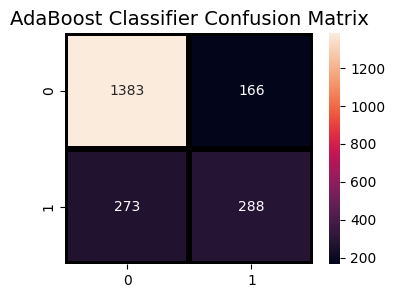

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

Gradiant Boosting Hyper Parameters Tuning

https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

✅ https://www.datacareer.de/blog/parameter-tuning-in-gradient-boosting-gbm/

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import make_scorer

model = GradientBoostingClassifier()
scorer = make_scorer(f1_score, average='weighted')

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001], # This determines the impact of each tree on the final outcome
    'n_estimators': [100, 200, 300],# The number of sequential trees to be modeled (step 2)
    'max_depth': [3, 5, 7], #
    'subsample': [0.5, 0.7, 1.0] # The fraction of observations to be selected for each tree. Selection is done by random sampling.
}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring=scorer, error_score=0)
grid_result = grid_search.fit(X_train, y_train)


In [ ]:
best_params = grid_result.best_params_
best_f1_score = grid_result.best_score_
best_recall = grid_search.best_score_
best_precision = grid_search.best_score_

# Print the results
print("Best F1 Score: %f using %s" % (best_f1_score, best_params))
print("Best Recall: %f using %s" % (best_recall, best_params))
print("Best Precision: %f using %s" % (best_precision, best_params))

Best F1 Score: 0.792281 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best Recall: 0.792281 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best Precision: 0.792281 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


Best Hyper Tubed parameters for GBM

Best F1 Score: 0.792281 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}

In [ ]:
gb = GradientBoostingClassifier(learning_rate=0.1,max_depth=3,n_estimators=100,subsample=1)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.8023696682464455


In [ ]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.65      0.56      0.60       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.80      0.80      2110



In [ ]:

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Get predicted probabilities for the positive class
predicted_probabilities = gb.predict_proba(X_test)[:, 1]

# Set threshold and convert predicted probabilities to binary predictions
threshold = 0.1  # Adjust the threshold as needed
predicted_y = (predicted_probabilities >= threshold).astype(int)

accuracy_gb = accuracy_score(y_test, predicted_y)
print("Gradient Boosting Classifier accuracy:", accuracy_gb)

# Generate classification report
classification_rep = classification_report(y_test, predicted_y)
print("Classification Report:\n", classification_rep)

Gradient Boosting Classifier accuracy: 0.6317535545023697
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.51      0.67      1549
           1       0.42      0.96      0.58       561

    accuracy                           0.63      2110
   macro avg       0.69      0.73      0.63      2110
weighted avg       0.82      0.63      0.65      2110



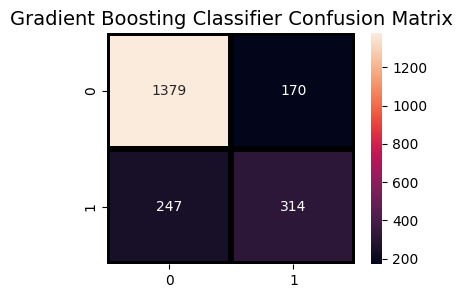

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()


XGBM Hyper Parameter Tuning of data

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

https://towardsdatascience.com/binary-classification-xgboost-hyperparameter-tuning-scenarios-by-non-exhaustive-grid-search-and-c261f4ce098d

 ✅:https://www.kdnuggets.com/2022/08/tuning-xgboost-hyperparameters.html

 ✅ https://xgboost.readthedocs.io/en/stable/parameter.html

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
scoring = {
    'weighted_f1': make_scorer(f1_score, average='weighted'),
    'weighted_recall': make_scorer(recall_score, average='weighted'),
    'weighted_precision': make_scorer(precision_score, average='weighted')
}

# Define the parameter grid to search over
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'scale_pos_weight': [1, 2, 5],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 5, 10],    }

xgb_clf = XGBClassifier()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(xgb_clf, param_grid, scoring=scoring, refit='weighted_f1', cv=cv)
grid_result = grid_search.fit(X_train, y_train)


In [ ]:
best_params = grid_result.best_params_
best_f1_score = grid_result.best_score_
best_recall = grid_search.best_score_
best_precision = grid_search.best_score_

# Print the results
print("Best F1 Score: %f using %s" % (best_f1_score, best_params))
print("Best Recall: %f using %s" % (best_recall, best_params))
print("Best Precision: %f using %s" % (best_precision, best_params))

Best F1 Score: 0.794360 using {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 1.0}
Best Recall: 0.794360 using {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 1.0}
Best Precision: 0.794360 using {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 1.0}


XBGM Best Hyper Paramter Tuned are

Best F1 Score: 0.794360 using {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 1.0}

In [ ]:
xgb_clf = XGBClassifier(learning_rate=0.1,max_depth=5,min_childweight=5,n_estimators=100,scale_pos_weight=1,subsample=1)
xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, xgb_pred))

[04:43:56] WARNING: ../src/learner.cc:767: 
Parameters: { "min_childweight" } are not used.

Gradient Boosting Classifier 0.7976303317535545


In [ ]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110



Light GBM Hyper Parameter Tuning

https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html#for-faster-speed

In [143]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')



In [ ]:
clf = lgb.LGBMClassifier()
param_grid = {
    'max_bin': [200, 300, 400],
    'learning_rate': [0.1, 0.01, 0.001],
    'num_leaves': [10, 20, 30],
    'min_gain_to_split': [0.1, 0.5, 1.0],
    'max_depth': [5, 10, 15],
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'max_depth': [3, 5, -1],  # -1 represents no limit
}

scoring = {
    'weighted_precision': make_scorer(precision_score, average='weighted'),
    'weighted_recall': make_scorer(recall_score, average='weighted'),
    'weighted_f1': make_scorer(f1_score, average='weighted'),
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring=scoring,
    refit='weighted_f1',
    cv=cv,
)
grid_result = grid_search.fit(X_train, y_train)


In [ ]:
best_params = grid_result.best_params_
best_f1_score = grid_result.best_score_
best_recall = grid_search.best_score_
best_precision = grid_search.best_score_

# Print the results
print("Best F1 Score: %f using %s" % (best_f1_score, best_params))
print("Best Recall: %f using %s" % (best_recall, best_params))
print("Best Precision: %f using %s" % (best_precision, best_params))

Best F1 Score: 0.797784 using {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'max_bin': 400, 'max_depth': 5, 'min_gain_to_split': 1.0, 'num_leaves': 30}
Best Recall: 0.797784 using {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'max_bin': 400, 'max_depth': 5, 'min_gain_to_split': 1.0, 'num_leaves': 30}
Best Precision: 0.797784 using {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'max_bin': 400, 'max_depth': 5, 'min_gain_to_split': 1.0, 'num_leaves': 30}


Best Hyper parameters to Light GBM are : Best F1 Score: 0.797784 using {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'max_bin': 400, 'max_depth': 5, 'min_gain_to_split': 1.0, 'num_leaves': 30}




In [144]:
params = {
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'max_bin': 400,
    'max_depth': 5,
    'min_gain_to_split': 1.0,
    'num_leaves': 30
}

lgb_model = lgb.LGBMClassifier(boosting_type='gbdt',learning_rate=0.1,max_bin=400,max_depth=5,min_gain_to_split=1,num_leaves=30)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
print("LGB Classifier", accuracy_score(y_test, lgb_pred))

[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1
LGB Classifier 0.7886255924170616


In [ ]:
print(classification_report(y_test, lgb_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.66      0.56      0.61       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



In [ ]:
# https://imbalanced-learn.org/stable/references/ensemble.html

XGBM model For Normal, Threshold Setting, Under Sampling and Over Samoling MOdels

In [151]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
from sklearn.model_selection import train_test_split

#For Sampling
from sklearn.utils import resample

#XGBoost Algorithm
import xgboost as xgb

#Evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import warnings
warnings.filterwarnings("ignore")

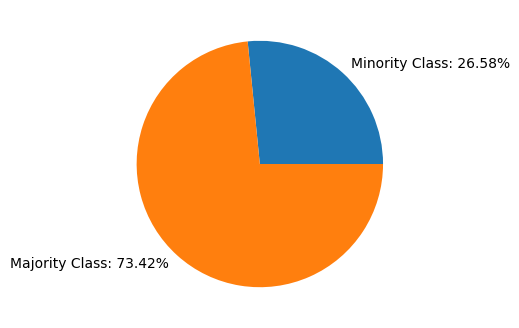

In [152]:
class_division = [data2[data2['Churn'] == 1].shape[0], data2[data2['Churn'] == 0].shape[0]]
my_labels = ['Minority Class', 'Majority Class']
total = sum(class_division)
percentages = [(count / total) * 100 for count in class_division]
labels_with_percentage = [f'{label}: {percentage:.2f}%' for label, percentage in zip(my_labels, percentages)]
plt.figure(figsize=(4,4))
plt.pie(class_division, labels=labels_with_percentage)
plt.show()

In [155]:
X = data2.drop(columns = ['Churn'])
y = data2['Churn'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y)
X.columns

Index(['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [156]:
print("Proportion of Minority Class in train set: " + str(round(y_train.sum()/len(y_train) * 100, 2)) + "%")
print("Proportion of Minority Class in test set: " + str(round(y_test.sum()/len(y_test) * 100, 2)) + "%")

Proportion of Minority Class in train set: 26.57%
Proportion of Minority Class in test set: 26.59%


Building Basic Model for XGBoost

In [157]:
xgb_classifier=xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
test=xgb_classifier.predict(X_test)

Here we will check for Accuracy ,F1 Score ,Precision and Recall

In [ ]:
print("Accuracy of Test Set :",round(accuracy_score(y_test,test)*100,2),'%')

Accuracy of Test Set : 78.01 %


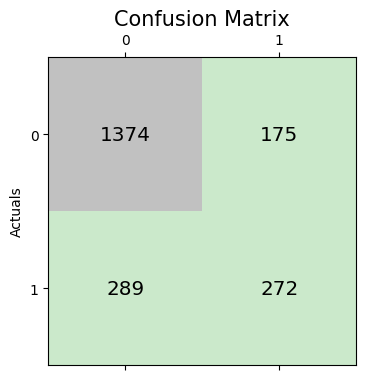

In [ ]:
conf_matrix=confusion_matrix(y_true=y_test,y_pred=test)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix,cmap=plt.cm.Accent,alpha=0.4)
for  i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
     ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')
#plt.xlabel('Predection',fontsize=10)
plt.ylabel('Actuals',fontsize=10)
plt.title('Confusion Matrix', fontsize=15)
plt.show()



In [ ]:
precision_original=round(precision_score(y_test,test),4)
recall_original=round(recall_score(y_test,test),4)
F1_score_original=round(f1_score(y_test,test),4)
metrics_original=[precision_original,recall_original,F1_score_original]
original=pd.DataFrame(metrics_original)
original.index=['Precision','Recall','F1 Score']
original.columns=['Original Data Set ']
original['Comments']=['Precision Score is 63.02 %','Recall Score is 54.37 % ','F1 Score is 58.37 %']
original

,Original Data Set,Comments
Precision,0.6085,Precision Score is 63.02 %
Recall,0.4848,Recall Score is 54.37 %
F1 Score,0.5397,F1 Score is 58.37 %


Even With high Accuracy of 79.38 % Model Do not perform well in precision ,recall and F1 Score. This is due to algorithm incapability to distinguish between  the minority and Majority class

# Changing the threshold


To understand how changing the threshold can help improve the efficacy of the model, we will iterate over a series of values ranging from 0.1 to 0.75, to identify the threshold which performs the best.

In [ ]:
cols=['Metrics','Original']
adj_threshold = pd.DataFrame()
adj_threshold['Original']=metrics_original
thresholds = [ j/20 for j in range(1,16)]
for i in thresholds:
  y_pred_new_threshold=(xgb_classifier.predict_proba(X_test)[:,1]>i).astype(int)
  # #calculating the threshold with respect to class 1

  precision_adj_threshold =  round(precision_score(y_test, y_pred_new_threshold, average='binary'), 4)
  recall_adj_threshold = round(recall_score(y_test, y_pred_new_threshold, average='binary'), 4)
  F1_score_adj_threshold =  round((f1_score(y_test, y_pred_new_threshold, average='binary')), 4)
  metrics_adj_threshold = [precision_adj_threshold, recall_adj_threshold, F1_score_adj_threshold]

  name = 'Threshold: ' + str(i)
  adj_threshold[name] = metrics_adj_threshold
  cols.append(name)

adj_threshold.index = ['Precision', 'Recall', 'F1_score']
adj_threshold = adj_threshold.reset_index()
adj_threshold.columns = cols
adj_threshold.transpose()

adj_threshold1 = adj_threshold.transpose().iloc[1:, :]
adj_threshold1.columns = adj_threshold.iloc[:,0]
adj_threshold1


Metrics,Precision,Recall,F1_score
Original,0.6085,0.4848,0.5397
Threshold: 0.05,0.4023,0.943,0.564
Threshold: 0.1,0.4505,0.8913,0.5984
Threshold: 0.15,0.4726,0.8307,0.6025
Threshold: 0.2,0.5018,0.7629,0.6054
Threshold: 0.25,0.5266,0.7059,0.6032
Threshold: 0.3,0.5526,0.6649,0.6036
Threshold: 0.35,0.5624,0.6185,0.5891
Threshold: 0.4,0.5769,0.5686,0.5727
Threshold: 0.45,0.5777,0.5169,0.5456


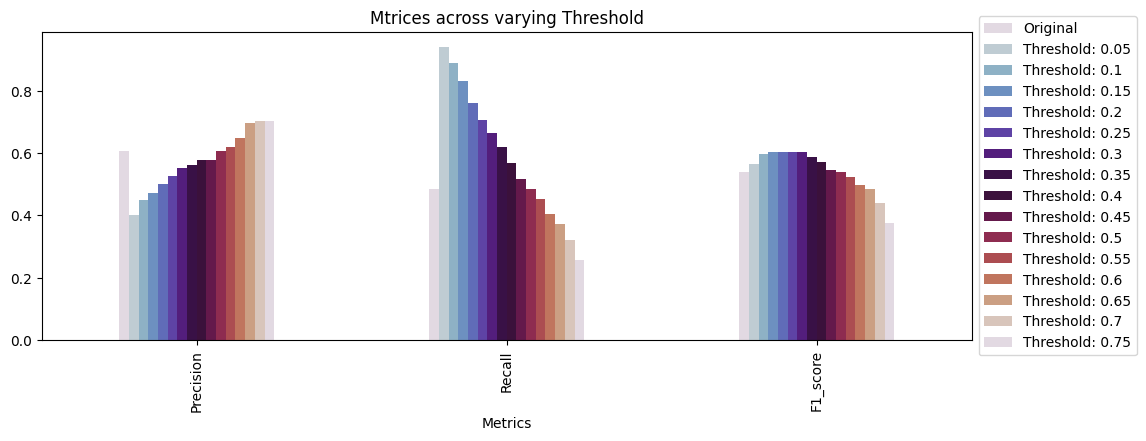

In [ ]:
adj_threshold.plot(x='Metrics',kind='bar',stacked=False,title='Mtrices across varying Threshold',figsize=(12,4),cmap='twilight').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

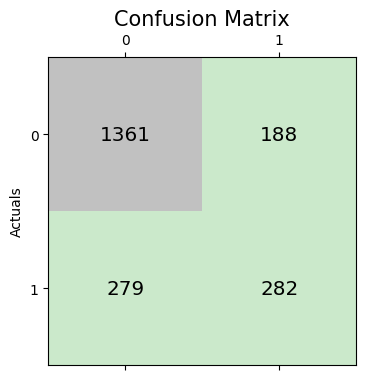

In [ ]:
THR=np.quantile(xgb_classifier.predict_proba(X_train)[:,1],1-0.26)

y_pred_new_threshold=(xgb_classifier.predict_proba(X_test)[:,1]>THR).astype(int)


conf_matrix=confusion_matrix(y_true=y_test,y_pred=y_pred_new_threshold)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix,cmap=plt.cm.Accent,alpha=0.4)
for  i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
     ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')
#plt.xlabel('Predection',fontsize=10)
plt.ylabel('Actuals',fontsize=10)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [ ]:
precision_changedthreshold =  round(precision_score(y_test, y_pred_new_threshold), 4)
recall_changedthreshold = round(recall_score(y_test, y_pred_new_threshold), 4)
F1_changedthreshold =  round(f1_score(y_test, y_pred_new_threshold), 4)
metrics_changedthreshold = [precision_changedthreshold, recall_changedthreshold, F1_changedthreshold]

changedthreshold = pd.DataFrame(list(zip(metrics_original, metrics_changedthreshold)))
changedthreshold.index = ['Precision', 'Recall', 'F1_score']
changedthreshold.columns = ['Original Dataset', 'Threshold Changed Dataset']
changedthreshold

,Original Dataset,Threshold Changed Dataset
Precision,0.6085,0.6000
Recall,0.4848,0.5027
F1_score,0.5397,0.5470


OverSampling

In [ ]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

X = data2.drop(columns=['Churn'])
y = data2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

train_data = pd.concat([X_train, y_train], axis=1)

response_zero = train_data[train_data['Churn'] == 0]
response_one = train_data[train_data['Churn'] == 1]

upsampled_one = resample(response_one,
                         replace=True,
                         n_samples=len(response_zero),
                         random_state=42)

upsampled = pd.concat([response_zero, upsampled_one])

# Separate the features (X) and target variable (y) in the upsampled dataset
X_upsampled = upsampled.drop(columns=['Churn'])
y_upsampled = upsampled['Churn']

# Now you can use the upsampled dataset (X_upsampled, y_upsampled) for further processing


In [ ]:
y_upsampled.value_counts()

0    3614
1    3614
Name: Churn, dtype: int64

In [ ]:
y_train.value_counts()

0    3614
1    1308
Name: Churn, dtype: int64

In [ ]:
X_train_upsampled = upsampled.drop(columns = ['Churn'])
y_train_upsampled = upsampled['Churn']

xgb_upsampled = xgb.XGBClassifier()

xgb_upsampled.fit(X_train_upsampled,y_train_upsampled)

train_upsampled = xgb_upsampled.predict(X_train_upsampled)
test_upsampled = xgb_upsampled.predict(X_test)

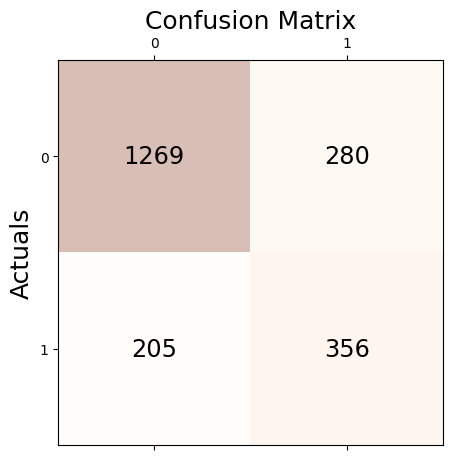

In [ ]:
#Confusion matrix on the test set
conf_matrix = confusion_matrix(y_true=y_test, y_pred=test_upsampled)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

#plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#New efficacy metrics
precision_upsampled =  round(precision_score(y_test, test_upsampled), 4)
recall_upsampled = round(recall_score(y_test, test_upsampled), 4)
F1_upsampled =  round(f1_score(y_test, test_upsampled), 4)
metrics_upsampled = [precision_upsampled, recall_upsampled, F1_upsampled]

upsampled = pd.DataFrame(list(zip(metrics_original, metrics_changedthreshold, metrics_upsampled)))
upsampled.index = ['Precision', 'Recall', 'F1_score']
upsampled.columns = ['Original Dataset', 'Threshold = 0.1', 'Upsampled Dataset']
upsampled

,Original Dataset,Threshold = 0.1,Upsampled Dataset
Precision,0.6085,0.6000,0.5597
Recall,0.4848,0.5027,0.6346
F1_score,0.5397,0.5470,0.5948


In [ ]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

X = data2.drop(columns=['Churn'])
y = data2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

train_data = pd.concat([X_train, y_train], axis=1)

response_zero = train_data[train_data['Churn'] == 0]
response_one = train_data[train_data['Churn'] == 1]

downsampled_zero = resample(response_zero,
                            replace=False,
                            n_samples=len(response_one),
                            random_state=42)

downsampled = pd.concat([downsampled_zero, response_one])

# Separate the features (X) and target variable (y) in the downsampled dataset
X_downsampled = downsampled.drop(columns=['Churn'])
y_downsampled = downsampled['Churn']

# Now you can use the downsampled dataset (X_downsampled, y_downsampled) for further processing


In [ ]:
y_train.value_counts()

0    3614
1    1308
Name: Churn, dtype: int64

In [ ]:
#Distribution of both the classes after down-sampling
downsampled['Churn'].value_counts()

0    1308
1    1308
Name: Churn, dtype: int64

In [ ]:
#Training the model on down-sampled data and testing on the original test dataset
X_train_downsampled = downsampled.drop(columns = ['Churn'])
y_train_downsampled = downsampled['Churn']

xgb_downsampled = xgb.XGBClassifier()

xgb_downsampled.fit(X_train_downsampled,y_train_downsampled)

train_downsampled = xgb_downsampled.predict(X_train_downsampled)
test_downsampled = xgb_downsampled.predict(X_test)

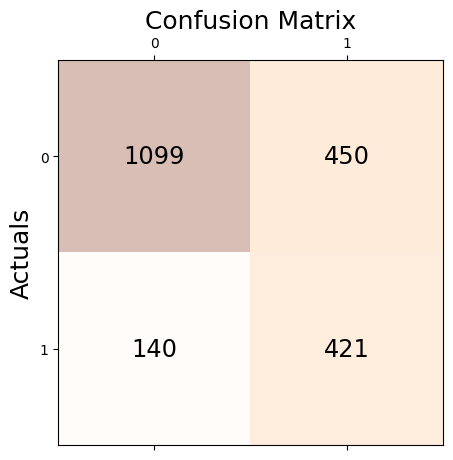

In [ ]:
#Confusion metrics of the model built on down-sampled data
conf_matrix = confusion_matrix(y_true=y_test, y_pred=test_downsampled)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

#plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#Final Metrics

precision_downsampled =  round(precision_score(y_test, test_downsampled), 4)
recall_downsampled = round(recall_score(y_test, test_downsampled), 4)
F1_downsampled =  round(f1_score(y_test, test_downsampled), 4)
metrics_downsampled = [precision_downsampled, recall_downsampled, F1_downsampled]

downsampled = pd.DataFrame(list(zip(metrics_original, metrics_changedthreshold,  metrics_upsampled, metrics_downsampled)))
downsampled.index = ['Precision', 'Recall', 'F1_score']
downsampled.columns = ['Original Dataset', 'Threshold = 0.1', 'Upsampled Dataset', 'Downsampled Dataset']
downsampled

,Original Dataset,Threshold = 0.1,Upsampled Dataset,Downsampled Dataset
Precision,0.6082,0.6090,0.5597,0.4834
Recall,0.5258,0.5330,0.6346,0.7504
F1_score,0.5641,0.5684,0.5948,0.5880


 https://imbalanced-learn.org/stable/references/ensemble.html

 https://www.youtube.com/watch?v=53uUM_5rRtA&list=PLLeO8f6PhlKYe_2PmjDX4FktnUEZsPKGV&index=5

 Way to Work On imbalance Data Set

 - Data Label PreProcessing - Under sampling / Over Sampling Techniques
 - Cost Sensitive Techniques - Balance the wights , Smote ,Cluster Centroid
 - Ensemblerd Techniques - Bagging Classifier with Smote

✍ Lets Work for
-  Weight Balance -
-  Random Over Sampler
-  SMOTE
- Random Under sampler
- Ensmble Baggibg and Pasting Techniques

In [107]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [108]:
X = data2.drop(columns = ['Churn'])
y = data2['Churn'].values

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40)

In [110]:
clf=LogisticRegression()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

[[1370  187]
 [ 253  300]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1557
           1       0.62      0.54      0.58       553

    accuracy                           0.79      2110
   macro avg       0.73      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110



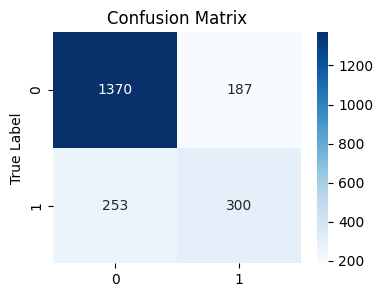

In [111]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
#plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


- Cost Senstive Learning Method - Weights Balancing
- Uses Binory class Entroy as a loss function to assign weights

In [112]:
clf=LogisticRegression(class_weight="balanced")
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

[[1097  460]
 [ 110  443]]
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1557
           1       0.49      0.80      0.61       553

    accuracy                           0.73      2110
   macro avg       0.70      0.75      0.70      2110
weighted avg       0.80      0.73      0.75      2110



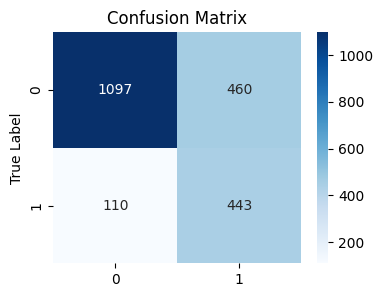

In [113]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
#plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Random Over Sampling from IMB Learn


In [114]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
X_train_resampled,y_train_resampled=ros.fit_resample(X_train,y_train)


In [115]:
print (X_train.shape,y_train.shape)
print(X_train_resampled.shape,y_train_resampled.shape)

(4922, 26) (4922,)
(7212, 26) (7212,)


In [116]:
clf=LogisticRegression()
clf.fit(X_train_resampled,y_train_resampled)
y_pred=clf.predict(X_test)

[[1102  455]
 [ 110  443]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1557
           1       0.49      0.80      0.61       553

    accuracy                           0.73      2110
   macro avg       0.70      0.75      0.70      2110
weighted avg       0.80      0.73      0.75      2110



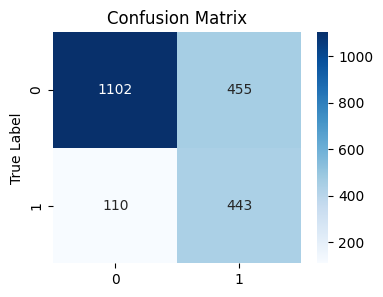

In [117]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
#plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

 ✍ SMOTE - Synthetic Minority Over Sampling Technique  - Uses KNN Method in Minority Class



In [118]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_train_resampled,y_train_resampled=smote.fit_resample(X_train,y_train)


In [119]:
print (X_train.shape,y_train.shape)
print(X_train_resampled.shape,y_train_resampled.shape)

(4922, 26) (4922,)
(7212, 26) (7212,)


In [120]:
clf=LogisticRegression()
clf.fit(X_train_resampled,y_train_resampled)
y_pred=clf.predict(X_test)

[[1179  378]
 [ 146  407]]
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1557
           1       0.52      0.74      0.61       553

    accuracy                           0.75      2110
   macro avg       0.70      0.75      0.71      2110
weighted avg       0.79      0.75      0.76      2110



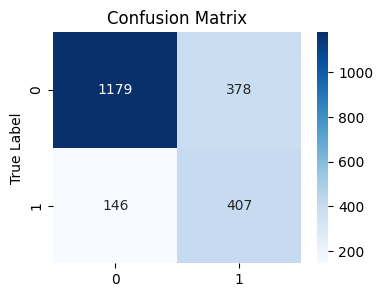

In [121]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
#plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

- Under Sampling Techniques

In [122]:
from imblearn.under_sampling import RandomUnderSampler
ros=RandomUnderSampler(random_state=0)
X_train_resampled,y_train_resampled=ros.fit_resample(X_train,y_train)

In [123]:
print (X_train.shape,y_train.shape)
print(X_train_resampled.shape,y_train_resampled.shape)

(4922, 26) (4922,)
(2632, 26) (2632,)


In [124]:
clf=LogisticRegression()
clf.fit(X_train_resampled,y_train_resampled)
y_pred=clf.predict(X_test)

[[1098  459]
 [ 112  441]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.79      1557
           1       0.49      0.80      0.61       553

    accuracy                           0.73      2110
   macro avg       0.70      0.75      0.70      2110
weighted avg       0.80      0.73      0.74      2110



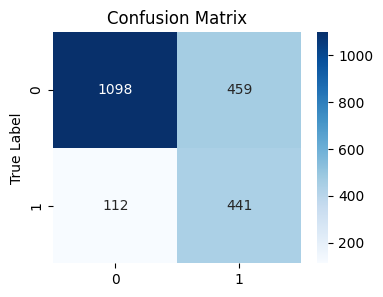

In [125]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
#plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

☝ ClusterCentroids Under Sampling Method Using Prototype Genration Method
-  K Means Clusing Algorthm creates applied on Majority of class to partion of
   data  on pre defined no of clusters
- USe those Centriod as a data points in majority of class
-  Uses aftifical Data points insted of data Points

In [126]:
from imblearn.under_sampling import ClusterCentroids
cc=ClusterCentroids(random_state=0)

In [127]:
X_train = X_train.astype(float)

In [128]:
X_train_resampled,y_train_resampled=cc.fit_resample(X_train,y_train)
print (X_train.shape,y_train.shape)
print(X_train_resampled.shape,y_train_resampled.shape)

(4922, 26) (4922,)
(2632, 26) (2632,)


In [129]:
clf=LogisticRegression()
clf.fit(X_train_resampled,y_train_resampled)
y_pred=clf.predict(X_test)

[[1062  495]
 [  99  454]]
              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1557
           1       0.48      0.82      0.60       553

    accuracy                           0.72      2110
   macro avg       0.70      0.75      0.69      2110
weighted avg       0.80      0.72      0.74      2110



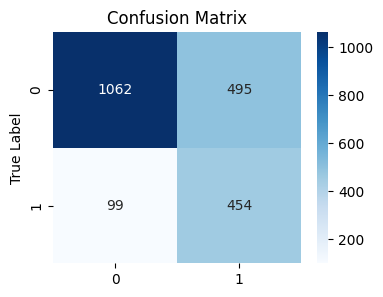

In [130]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
#plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

✅ Ensemble Learning and Bagging Classifier

- Uses the subset of data for training to aggregate their individaul Predections
- Sampling With Replacement - called as Bagging &  without Replacement -
 called as Pasting

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns

In [132]:
smote=SMOTE()
X_train_resampled,y_train_resampled=smote.fit_resample(X_train,y_train)

In [133]:
clf=BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=10,random_state=0).fit(X_train_resampled,y_train_resampled)
y_pred=clf.predict(X_test)

[[1115  442]
 [ 110  443]]
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1557
           1       0.50      0.80      0.62       553

    accuracy                           0.74      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.80      0.74      0.75      2110



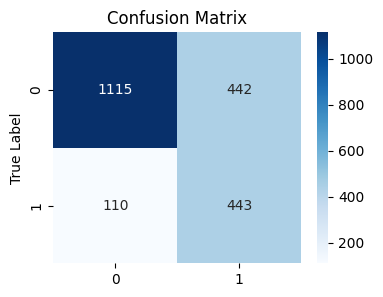

In [134]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
#plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [162]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier()
}


results_df = pd.DataFrame(columns=['Model', 'Weighted Precision', 'Weighted Recall', 'Weighted F1 Score'])


for model_name in models:
    model = models[model_name]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    precision = precision_score(y_test, y_pred, average='weighted')

    recall = recall_score(y_test, y_pred, average='weighted')

    f1 = f1_score(y_test, y_pred, average='weighted')

    results_df = results_df.append({'Model': model_name,
                                    'Weighted Precision': precision,
                                    'Weighted Recall': recall,
                                    'Weighted F1 Score': f1}, ignore_index=True)

# Print the DataFrame
results_df


,Model,Weighted Precision,Weighted Recall,Weighted F1 Score
0,KNN,0.766727,0.767773,0.767238
1,SVM,0.788642,0.798104,0.791070
2,Random Forest,0.777383,0.788626,0.780082
3,Logistic Regression,0.791159,0.798104,0.793618
4,Decision Tree,0.732340,0.730332,0.731308
5,AdaBoost,0.786719,0.795261,0.789376
6,Gradient Boosting,0.791476,0.800948,0.793700
7,XGBoost,0.771449,0.781517,0.774662
8,LightGBM,0.780068,0.789100,0.782959


In [161]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb

# Create a list of model names
model_names = ['KNN', 'SVM', 'Random Forest', 'Logistic Regression', 'Decision Tree', 'AdaBoost', 'Gradient Boosting', 'XGBoost', 'LightGBM']

# Create a list of corresponding models with tuned hyperparameters
models = [
    KNeighborsClassifier(metric='manhattan',n_neighbors=31,weights='uniform'),
    SVC(C=1, gamma='auto', kernel='sigmoid'),
    RandomForestClassifier(n_estimators=200, max_depth=10, max_features='auto', min_samples_leaf=4, min_samples_split=10),
    LogisticRegression(C=100, class_weight=None),
    DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5, min_samples_leaf=2, min_samples_split=10),
    AdaBoostClassifier(learning_rate=0.1, n_estimators=200),
    GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1),
    XGBClassifier(learning_rate=0.1, max_depth=5, min_childweight=5, n_estimators=100, scale_pos_weight=1, subsample=1),
    lgb.LGBMClassifier(boosting_type='gbdt', learning_rate=0.1, max_bin=400, max_depth=5, min_gain_to_split=1, num_leaves=30)
]

model_metrics = []

for model, model_name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_ts_pred = model.predict(X_test)
    classification_rep = classification_report(y_test, y_ts_pred, output_dict=True)

    metrics = {
        'Model Name': model_name,
        'F1 Score': classification_rep['weighted avg']['f1-score'],
        'Precision': classification_rep['weighted avg']['precision'],
        'Recall': classification_rep['weighted avg']['recall']
    }

    model_metrics.append(metrics)

# Create a data frame from the model metrics
df = pd.DataFrame(model_metrics)

# Print the data frame
df


[11:38:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_childweight" } are not used.

[LightGBM] [Warning] min_gain_to_split is set=1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1


,Model Name,F1 Score,Precision,Recall
0,KNN,0.790453,0.789942,0.790995
1,SVM,0.794302,0.791830,0.799052
2,Random Forest,0.790816,0.788327,0.797630
3,Logistic Regression,0.796389,0.794057,0.800474
4,Decision Tree,0.789333,0.789098,0.789573
5,AdaBoost,0.794683,0.792506,0.801896
6,Gradient Boosting,0.793700,0.791476,0.800948
7,XGBoost,0.781834,0.778970,0.789100
8,LightGBM,0.788445,0.785840,0.795261


In [166]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_train_resampled,y_train_resampled=smote.fit_resample(X_train,y_train)


import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


models = {
    'SMOTE_KNN': KNeighborsClassifier(),
    'SMOTE_SVM': SVC(),
    'SMOTE_Random Forest': RandomForestClassifier(),
    'SMOTE_Logistic Regression': LogisticRegression(),
    'SMOTE_Decision Tree': DecisionTreeClassifier(),
    'SMOTE_AdaBoost': AdaBoostClassifier(),
    'SMOTE_Gradient Boosting': GradientBoostingClassifier(),
    'SMOTE_XGBoost': XGBClassifier(),
    'SMOTE_LightGBM': LGBMClassifier()
}


results_df = pd.DataFrame(columns=['Model', 'Weighted Precision', 'Weighted Recall', 'Weighted F1 Score'])


for model_name in models:
    model = models[model_name]
    model.fit(X_train_resampled,y_train_resampled)
    y_pred = model.predict(X_test)


    precision = precision_score(y_test, y_pred, average='weighted')

    recall = recall_score(y_test, y_pred, average='weighted')

    f1 = f1_score(y_test, y_pred, average='weighted')

    results_df = results_df.append({'Model': model_name,
                                    'Weighted Precision': precision,
                                    'Weighted Recall': recall,
                                    'Weighted F1 Score': f1}, ignore_index=True)

# Print the DataFrame
results_df




,Model,Weighted Precision,Weighted Recall,Weighted F1 Score
0,SMOTE_KNN,0.772852,0.716588,0.731198
1,SMOTE_SVM,0.793372,0.761611,0.771186
2,SMOTE_Random Forest,0.773668,0.759716,0.765193
3,SMOTE_Logistic Regression,0.796634,0.762559,0.772487
4,SMOTE_Decision Tree,0.739498,0.718957,0.726925
5,SMOTE_AdaBoost,0.798520,0.749289,0.761707
6,SMOTE_Gradient Boosting,0.797680,0.763033,0.773035
7,SMOTE_XGBoost,0.776075,0.762559,0.767873
8,SMOTE_LightGBM,0.786491,0.765877,0.773074


In [167]:
from imblearn.under_sampling import ClusterCentroids
cc=ClusterCentroids(random_state=0)
X_train = X_train.astype(float)
X_train_resampled,y_train_resampled=cc.fit_resample(X_train,y_train)


import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


models = {
    'CC_KNN': KNeighborsClassifier(),
    'CC_SVM': SVC(),
    'CC_Random Forest': RandomForestClassifier(),
    'CC_Logistic Regression': LogisticRegression(),
    'CC_Decision Tree': DecisionTreeClassifier(),
    'CC_AdaBoost': AdaBoostClassifier(),
    'CC_Gradient Boosting': GradientBoostingClassifier(),
    'CC_XGBoost': XGBClassifier(),
    'CC_LightGBM': LGBMClassifier()
}


results_df = pd.DataFrame(columns=['Model', 'Weighted Precision', 'Weighted Recall', 'Weighted F1 Score'])


for model_name in models:
    model = models[model_name]
    model.fit(X_train_resampled,y_train_resampled)
    y_pred = model.predict(X_test)


    precision = precision_score(y_test, y_pred, average='weighted')

    recall = recall_score(y_test, y_pred, average='weighted')

    f1 = f1_score(y_test, y_pred, average='weighted')

    results_df = results_df.append({'Model': model_name,
                                    'Weighted Precision': precision,
                                    'Weighted Recall': recall,
                                    'Weighted F1 Score': f1}, ignore_index=True)

# Print the DataFrame
results_df


,Model,Weighted Precision,Weighted Recall,Weighted F1 Score
0,CC_KNN,0.790640,0.708531,0.725217
1,CC_SVM,0.793643,0.718483,0.734347
2,CC_Random Forest,0.792862,0.716588,0.732605
3,CC_Logistic Regression,0.794282,0.723697,0.739050
4,CC_Decision Tree,0.750832,0.648815,0.669254
5,CC_AdaBoost,0.797099,0.696209,0.713889
6,CC_Gradient Boosting,0.794766,0.684834,0.703107
7,CC_XGBoost,0.778776,0.627014,0.646496
8,CC_LightGBM,0.785872,0.644076,0.663401


Voting Classifier

In [135]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.8009478672985783


In [136]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1557
           1       0.64      0.54      0.59       553

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



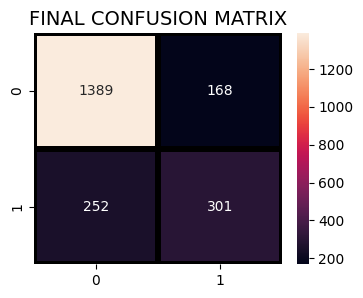

In [137]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

In [138]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Define the individual classifiers
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()

# Create the VotingClassifier
eclf = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')

# Fit the VotingClassifier on the training data
eclf.fit(X_train, y_train)

# Get predicted probabilities for the positive class
predicted_probabilities = eclf.predict_proba(X_test)[:, 1]

# Set threshold and convert predicted probabilities to binary predictions
threshold = 0.26  # Adjust the threshold as needed
predicted_y = (predicted_probabilities >= threshold).astype(int)

# Generate classification report
classification_rep = classification_report(y_test, predicted_y)
print("Classification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.56      0.71      1557
           1       0.43      0.92      0.58       553

    accuracy                           0.65      2110
   macro avg       0.69      0.74      0.64      2110
weighted avg       0.81      0.65      0.67      2110

